# **ABSTRACT**

1. & 7. This research aims a task of UNCOVER COVID-19 Challenge. I used search interest dataset collected from Google Trends. The dataset contains search interest over the past 12 months calculated by week. See https://www.kaggle.com/luckybro/mental-health-search-term for details.
2. The scientific methods involve visual inspection of the trends, statistical measurements and hypothesis testing.
3. & 6. The impact of COVID-19 to the demand for mental health services among different countries is explored through comparing the search interest of mental health related terms during the outbreak with normal time.
4. & 5. The shift of concern, which indicates an increase of demand for mental health services, reminds mental health institutions to provide more professional web service, instead of having users free of expertise randomly searching online. Policy can be made based on the results. 

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as nump
from datetime import datetime

In [2]:
# Load the data for each country.
canada_data = pd.read_excel("../input/mental-health-search-term/search_term_canada.xlsx", index_col="Week")
canada_data_19 = pd.read_excel("../input/mental-health-search-term/search_term_canada_19.xlsx", index_col="Week")
canada_data_18 = pd.read_excel("../input/mental-health-search-term/search_term_canada_18.xlsx", index_col="Week")
canada_data_17 = pd.read_excel("../input/mental-health-search-term/search_term_canada_17.xlsx", index_col="Week")
canada_data_16 = pd.read_excel("../input/mental-health-search-term/search_term_canada_16.xlsx", index_col="Week")

iran_data = pd.read_excel("../input/mental-health-search-term/search_term_iran.xlsx", index_col="Week")
italy_data = pd.read_excel("../input/mental-health-search-term/search_term_italy.xlsx", index_col="Week")
japan_data = pd.read_excel("../input/mental-health-search-term/search_term_japan.xlsx", index_col="Week")
sk_data = pd.read_excel("../input/mental-health-search-term/search_term_sk.xlsx", index_col="Week")
uk_data = pd.read_excel("../input/mental-health-search-term/search_term_uk.xlsx", index_col="Week")
us_data = pd.read_excel("../input/mental-health-search-term/search_term_us.xlsx", index_col="Week")
worldwide_data = pd.read_excel("../input/mental-health-search-term/search_term_worldwide.xlsx", index_col="Week")


**Worldwide**

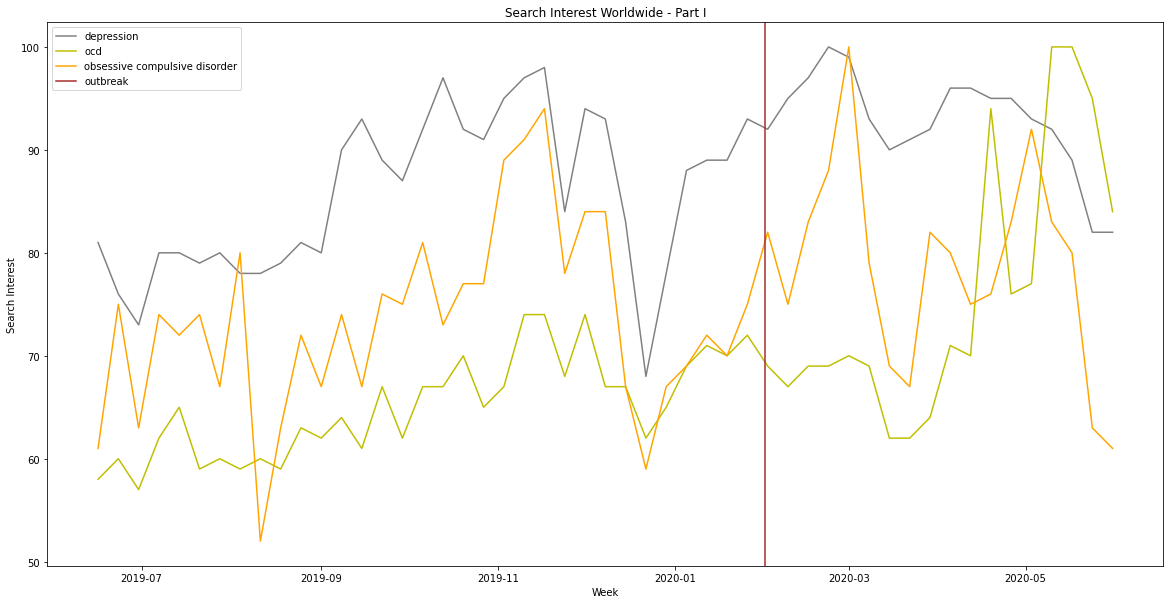

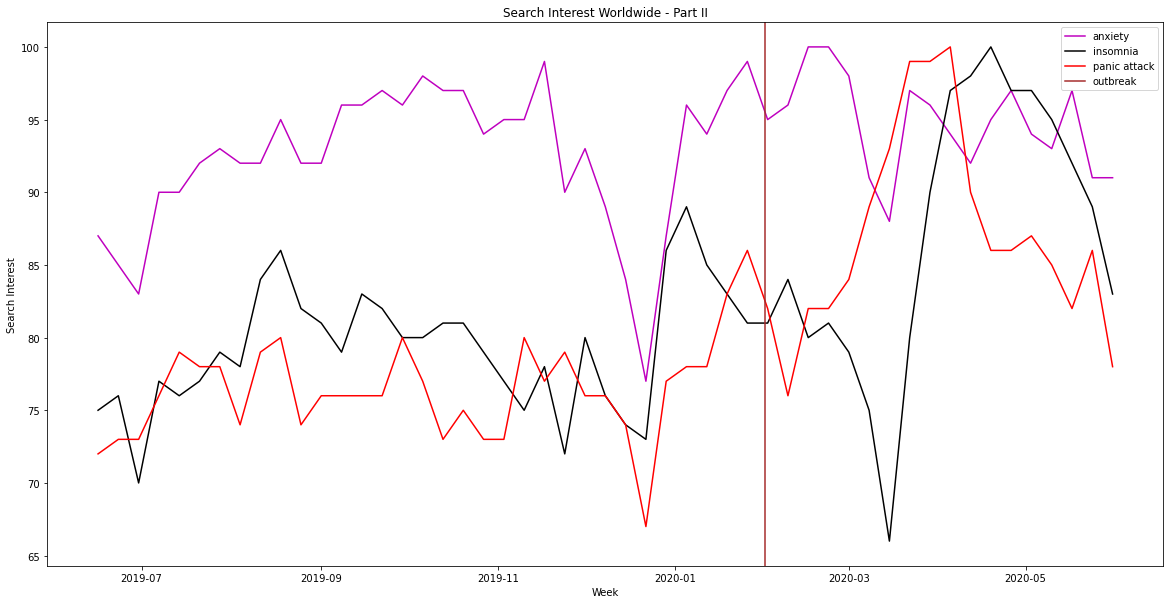

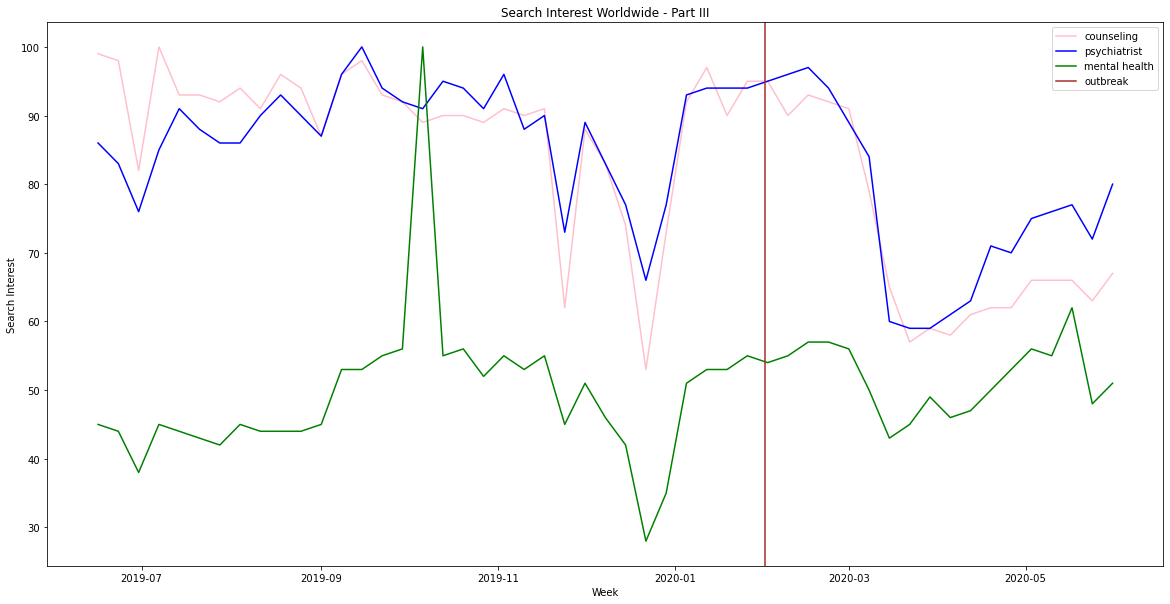

In [3]:
# Plot the search interest worldwide.
plt.figure(figsize=(20, 10))
plt.plot(worldwide_data.index, worldwide_data['depression'], color='gray')
plt.plot(worldwide_data.index, worldwide_data['ocd'], color='y')
plt.plot(worldwide_data.index, worldwide_data['obsessive compulsive disorder'], color='orange')
plt.axvline(x='2020-02', color='brown')

plt.legend(['depression', 'ocd', 'obsessive compulsive disorder', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Worldwide - Part I');

plt.figure(figsize=(20, 10))
plt.plot(worldwide_data.index, worldwide_data['anxiety'], color='m')
plt.plot(worldwide_data.index, worldwide_data['insomnia'], color='black')
plt.plot(worldwide_data.index, worldwide_data['panic attack'], color='r')
plt.axvline(x='2020-02', color='brown')

plt.legend(['anxiety', 'insomnia', 'panic attack', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Worldwide - Part II');

plt.figure(figsize=(20, 10))
plt.plot(worldwide_data.index, worldwide_data['counseling'], color='pink')
plt.plot(worldwide_data.index, worldwide_data['psychiatrist'], color='blue')
plt.plot(worldwide_data.index, worldwide_data['mental health'], color='green')
plt.axvline(x='2020-02', color='brown')

plt.legend(['counseling', 'psychiatrist', 'mental health', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Worldwide - Part III');


The three plots above show the trends of search interest of these mental health related terms before and during the pandemic.

Part I and part II show the trends of "anxiety", "depression", "ocd", etc.. These are specific mental condition or symptoms. By visual inspection, we can tell that before the outbreak, indicated by the vertical brown line, roughtly the end of January when the global outbreak actually began, the search interest for these terms have more frequent peaks and relatively small value; whereas past the vertical line the peaks become less but more clustered and with higher value.

Part III shows the trends of "counseling", "psychiatrist" and "mental health". They are more general and meta terms. Their trends behave rather differently from those of specific terms. After the outbreak, their search interest drops and there is no significant peak.

In [4]:
plt.figure(figsize=(20, 20))
plt.title("Search Interest of Each Term by Week")
sns.heatmap(data=worldwide_data, annot=True)
plt.xlabel("Term");
plt.ylabel("Date");

In [5]:
terms = worldwide_data.columns.values

maximum_peaks = nump.max(worldwide_data, axis=0)
maximum_dates = [datetime.fromtimestamp(worldwide_data.index[worldwide_data[t] == maximum_peaks[t]][0].value / 1000000000) for t in terms]
print("The maximum peak of each term:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] +"  " + str(maximum_dates[i])))

The maximum peak of each term:
                             depression  2020-02-23 00:00:00                              
                               anxiety  2020-02-16 00:00:00                               
                    obsessive compulsive disorder  2020-03-01 00:00:00                    
                                 ocd  2020-05-10 00:00:00                                 
                              insomnia  2020-04-19 00:00:00                               
                            panic attack  2020-04-05 00:00:00                             
                            mental health  2019-10-06 00:00:00                            
                             counseling  2019-07-07 00:00:00                              
                            psychiatrist  2019-09-15 00:00:00                             


Peak before the outbreak: "mental health", "counseling", "psychiatrist"

Peak after the outbreak: "depression", "anxiety", "obsessive compulsive disorder", "ocd", "insomnia", "panic attack"

In [6]:
overall_average = nump.average(worldwide_data, axis=0)
before_average = nump.average(worldwide_data.loc[worldwide_data.index < '2020-01-31'], axis=0)
after_average = nump.average(worldwide_data.loc[worldwide_data.index >= '2020-01-31'], axis=0)
av = nump.average(worldwide_data.loc[worldwide_data.index >= '2020-01-31'], axis=1)
print("The average interest of each term over the 12 months:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % overall_average[i]))
print()
          
print("The average interest of each term before Jan, 31, 2020:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % before_average[i]))
print()

print("The average interest of each term after Jan, 31, 2020:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % after_average[i]))  
print()

The average interest of each term over the 12 months:
                                   depression    88.12                                    
                                     anxiety    93.22                                     
                          obsessive compulsive disorder    75.24                          
                                       ocd    68.92                                       
                                    insomnia    81.94                                     
                                  panic attack    80.16                                   
                                  mental health    50.18                                  
                                   counseling    82.88                                    
                                  psychiatrist    84.04                                   

The average interest of each term before Jan, 31, 2020:
                                   depression    85.61                

In [7]:
world_diff = after_average - before_average

In [8]:
print("The average interest of each term after the outbreak changed by:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "  " + "%.2f" % (100 * (after_average[i] - before_average[i]) / before_average[i]) + "%"))

The average interest of each term after the outbreak changed by:
                                    depression  8.31%                                     
                                      anxiety  2.52%                                      
                           obsessive compulsive disorder  7.47%                           
                                       ocd  16.81%                                        
                                     insomnia  9.65%                                      
                                   panic attack  13.84%                                   
                                   mental health  5.37%                                   
                                   counseling  -19.30%                                    
                                  psychiatrist  -13.12%                                   


Average search interest increased after the outbreak: "depression", "anxiety", "obsessive compulsive disorder", "ocd", "insomnia", "panic attack", "mental health"

Average search interest decreased after the outbreak: "counseling", "psychiatrist"

In [9]:
overall_var = nump.var(worldwide_data, axis=0)
before_var = nump.var(worldwide_data.loc[worldwide_data.index < '2020-01-31'], axis=0)
after_var = nump.var(worldwide_data.loc[worldwide_data.index >= '2020-01-31'], axis=0)
print("The variance of each term over the 12 months:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % overall_var[i]))
print()
          
print("The variance of each term before Jan, 31:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % before_var[i]))
print()

print("The variance of each term after Jan, 31:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % after_var[i]))  
print()

The variance of each term over the 12 months:
                                   depression    56.89                                    
                                     anxiety    20.91                                     
                          obsessive compulsive disorder    90.49                          
                                       ocd    97.76                                       
                                    insomnia    55.04                                     
                                  panic attack    49.39                                   
                                  mental health    90.03                                  
                                   counseling    196.57                                   
                                  psychiatrist    125.65                                  

The variance of each term before Jan, 31:
                                   depression    57.81                                    
 

**US**

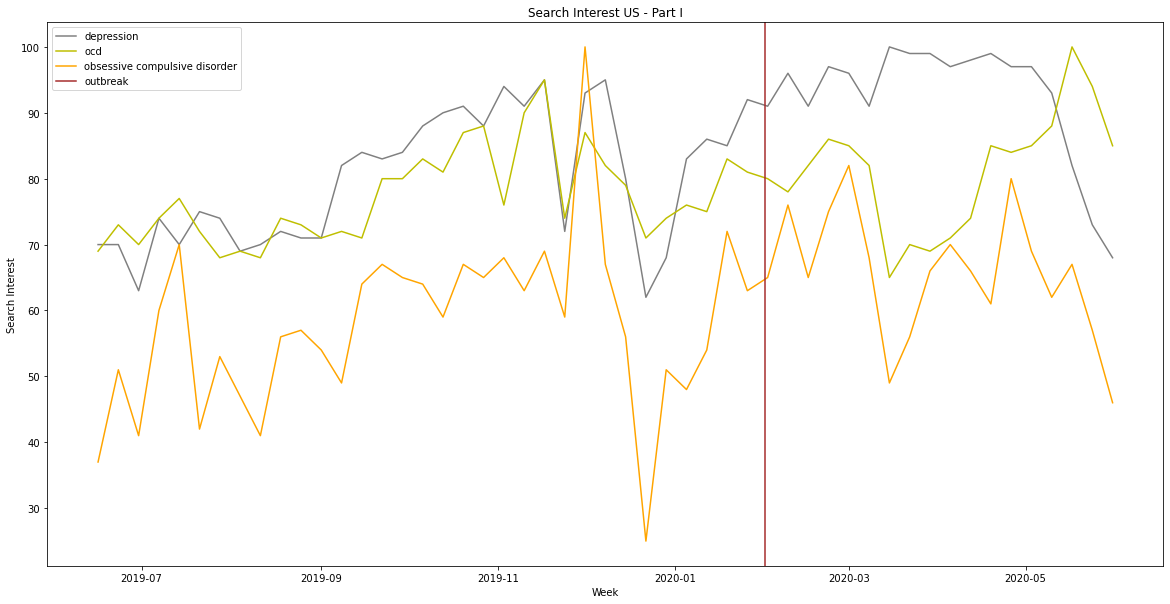

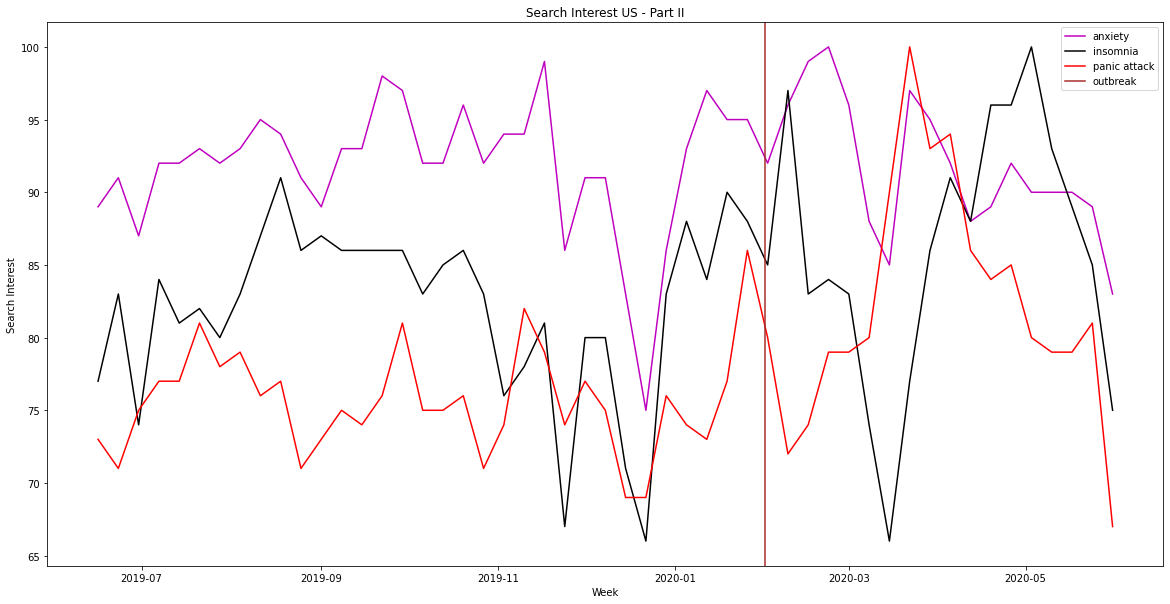

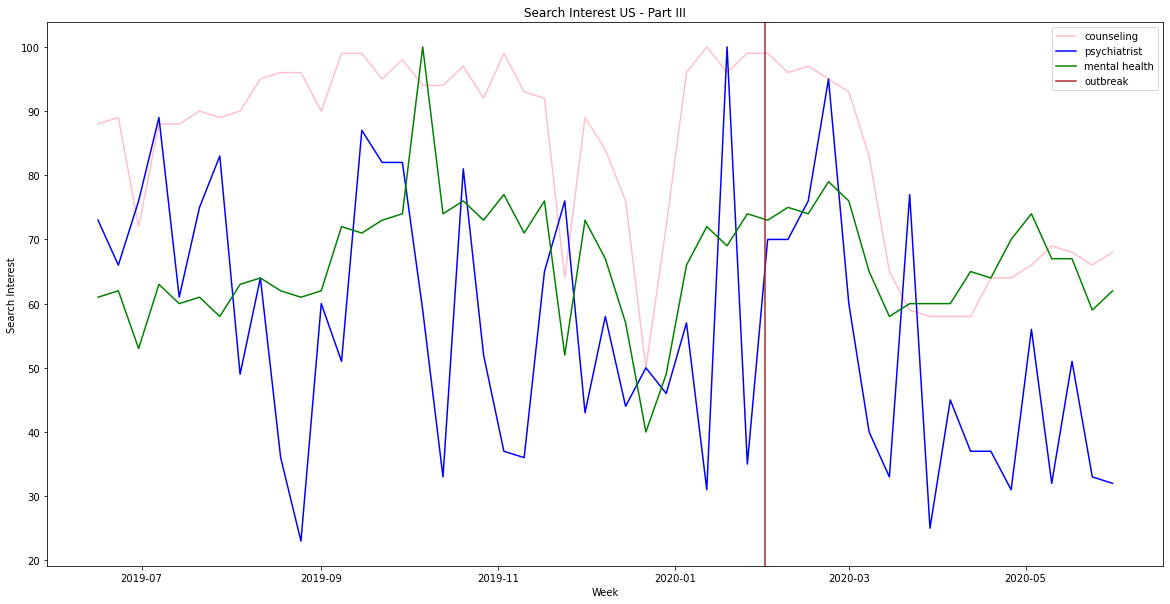

In [10]:
# Plot the search interest in US.
plt.figure(figsize=(20, 10))
plt.plot(us_data.index, us_data['depression'], color='gray')
plt.plot(us_data.index, us_data['ocd'], color='y')
plt.plot(us_data.index, us_data['obsessive compulsive disorder'], color='orange')
plt.axvline(x='2020-02', color='brown')

plt.legend(['depression', 'ocd', 'obsessive compulsive disorder', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest US - Part I');

plt.figure(figsize=(20, 10))
plt.plot(us_data.index, us_data['anxiety'], color='m')
plt.plot(us_data.index, us_data['insomnia'], color='black')
plt.plot(us_data.index, us_data['panic attack'], color='r')
plt.axvline(x='2020-02', color='brown')

plt.legend(['anxiety', 'insomnia', 'panic attack', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest US - Part II');

plt.figure(figsize=(20, 10))
plt.plot(us_data.index, us_data['counseling'], color='pink')
plt.plot(us_data.index, us_data['psychiatrist'], color='blue')
plt.plot(us_data.index, us_data['mental health'], color='green')
plt.axvline(x='2020-02', color='brown')

plt.legend(['counseling', 'psychiatrist', 'mental health', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest US - Part III');

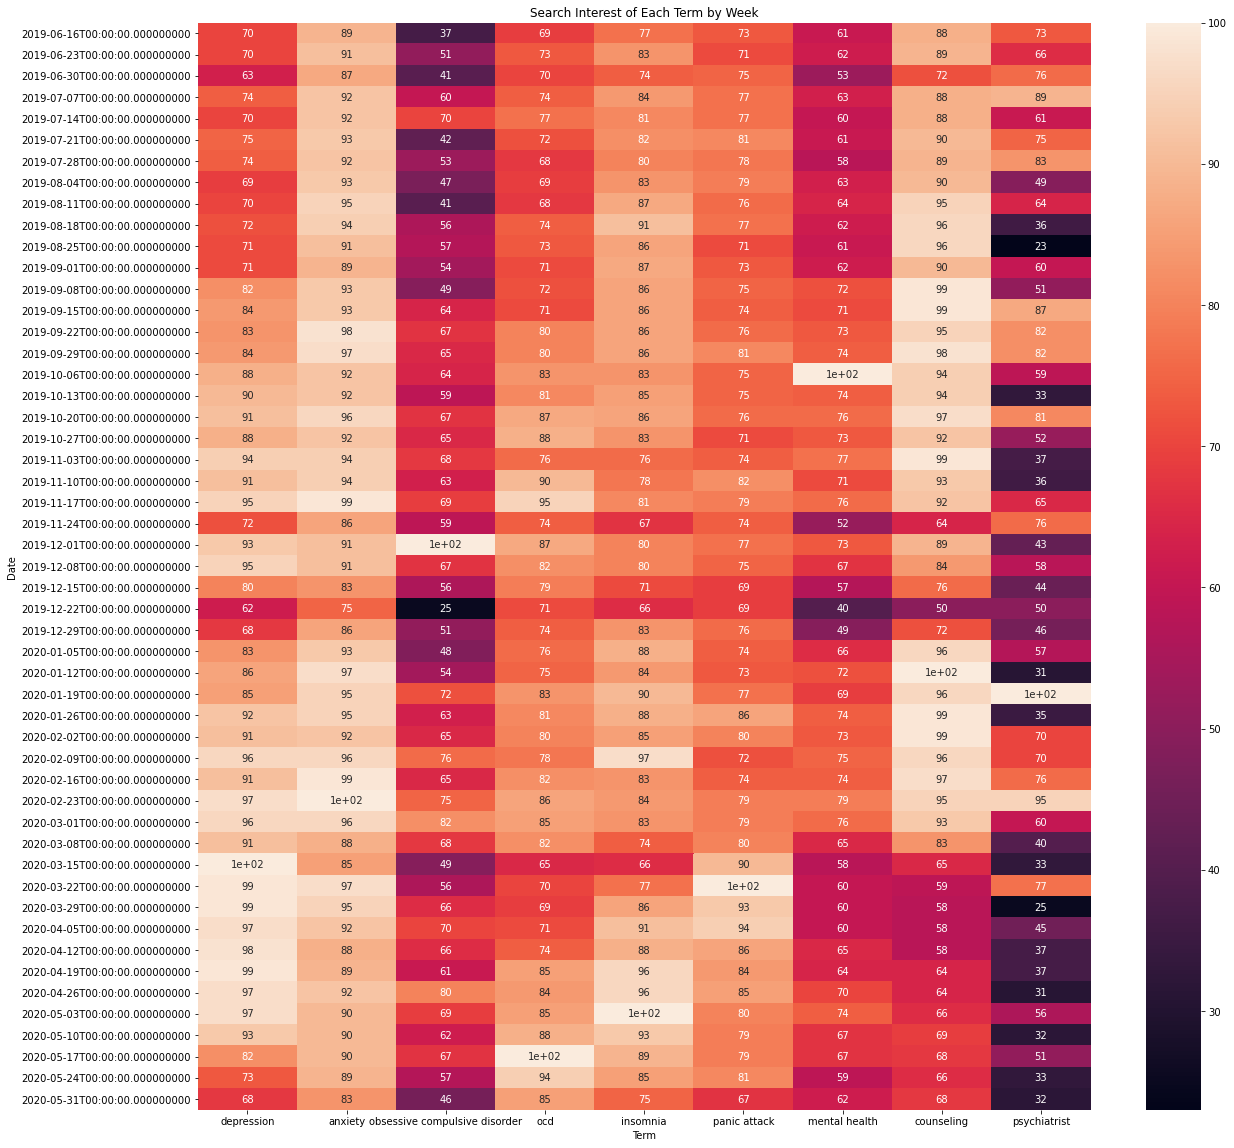

In [11]:
plt.figure(figsize=(20, 20))
plt.title("Search Interest of Each Term by Week")
sns.heatmap(data=us_data, annot=True)
plt.xlabel("Term");
plt.ylabel("Date");

In [12]:
maximum_peaks = nump.max(us_data, axis=0)
maximum_dates = [datetime.fromtimestamp(us_data.index[us_data[t] == maximum_peaks[t]][0].value / 1000000000) for t in terms]
print("The maximum peak of each term:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] +"  " + str(maximum_dates[i])))

The maximum peak of each term:
                             depression  2020-03-15 00:00:00                              
                               anxiety  2020-02-23 00:00:00                               
                    obsessive compulsive disorder  2019-12-01 00:00:00                    
                                 ocd  2020-05-17 00:00:00                                 
                              insomnia  2020-05-03 00:00:00                               
                            panic attack  2020-03-22 00:00:00                             
                            mental health  2019-10-06 00:00:00                            
                             counseling  2020-01-12 00:00:00                              
                            psychiatrist  2020-01-19 00:00:00                             


Peak before the outbreak: "obsessive compulsive disorder", "mental health", "counseling", "psychiatrist"

Peak after the outbreak: "depression", "anxiety", "ocd", "insomnia", "panic attack"

In [13]:
overall_average = nump.average(us_data, axis=0)
before_average = nump.average(us_data.loc[us_data.index < '2020-01-31'], axis=0)
after_average = nump.average(us_data.loc[us_data.index >= '2020-01-31'], axis=0)
print("The average interest of each term over the 12 months:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % overall_average[i]))
print()
          
print("The average interest of each term before Jan, 31, 2020:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % before_average[i]))
print()

print("The average interest of each term after Jan, 31, 2020:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % after_average[i]))  
print()

The average interest of each term over the 12 months:
                                   depression    84.29                                    
                                     anxiety    91.78                                     
                          obsessive compulsive disorder    60.47                          
                                       ocd    78.55                                       
                                    insomnia    83.45                                     
                                  panic attack    78.00                                   
                                  mental health    66.55                                  
                                   counseling    83.82                                    
                                  psychiatrist    56.08                                   

The average interest of each term before Jan, 31, 2020:
                                   depression    79.85                

In [14]:
us_diff = after_average - before_average

In [15]:
print("The average interest of each term after the outbreak changed by:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "  " + "%.2f" % (100 * (after_average[i] - before_average[i]) / before_average[i]) + "%"))

The average interest of each term after the outbreak changed by:
                                    depression  15.77%                                    
                                     anxiety  -0.10%                                      
                          obsessive compulsive disorder  13.62%                           
                                        ocd  5.47%                                        
                                     insomnia  4.80%                                      
                                   panic attack  8.85%                                    
                                   mental health  1.31%                                   
                                   counseling  -17.57%                                    
                                  psychiatrist  -15.82%                                   


Average search interest increased after the outbreak: "depression", "ocd", "panic attack", "mental health"

Average search interest decreased after the outbreak: "anxiety", "obsessive compulsive disorder", "insomnia", "counseling", "psychiatrist"

In [16]:
overall_var = nump.var(us_data, axis=0)
before_var = nump.var(us_data.loc[us_data.index < '2020-01-31'], axis=0)
after_var = nump.var(us_data.loc[us_data.index >= '2020-01-31'], axis=0)
print("The variance of each term over the 12 months:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % overall_var[i]))
print()
          
print("The variance of each term before Jan, 31:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % before_var[i]))
print()

print("The variance of each term after Jan, 31:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % after_var[i]))  
print()

The variance of each term over the 12 months:
                                   depression    126.91                                   
                                     anxiety    20.64                                     
                         obsessive compulsive disorder    155.15                          
                                       ocd    60.80                                       
                                    insomnia    52.88                                     
                                  panic attack    40.59                                   
                                  mental health    85.82                                  
                                   counseling    212.26                                   
                                  psychiatrist    402.27                                  

The variance of each term before Jan, 31:
                                   depression    97.22                                    
 

**UK**

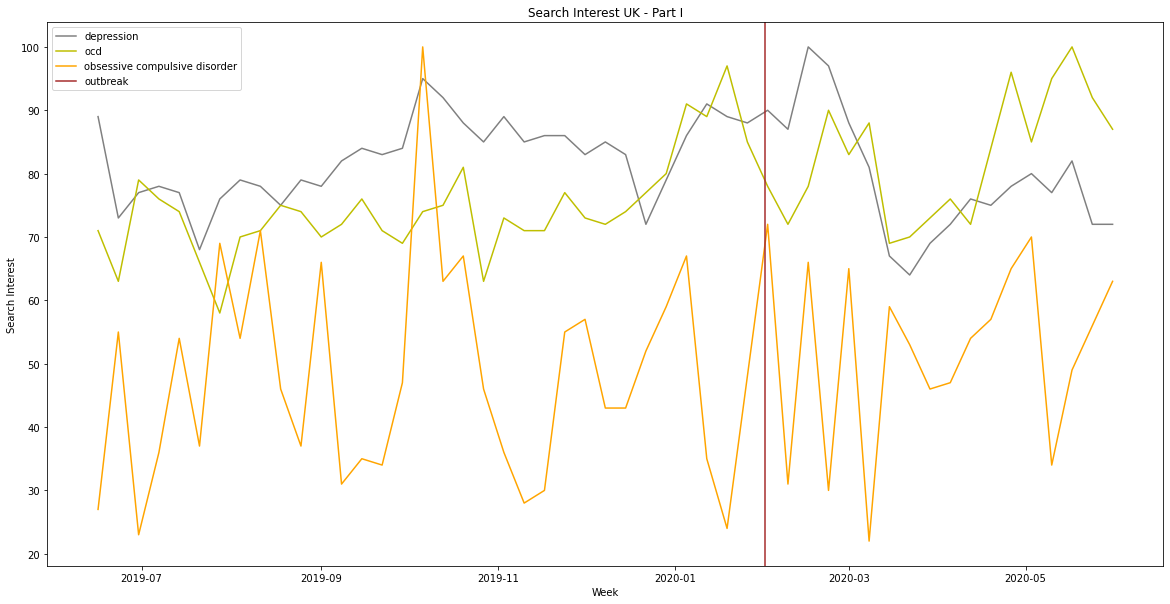

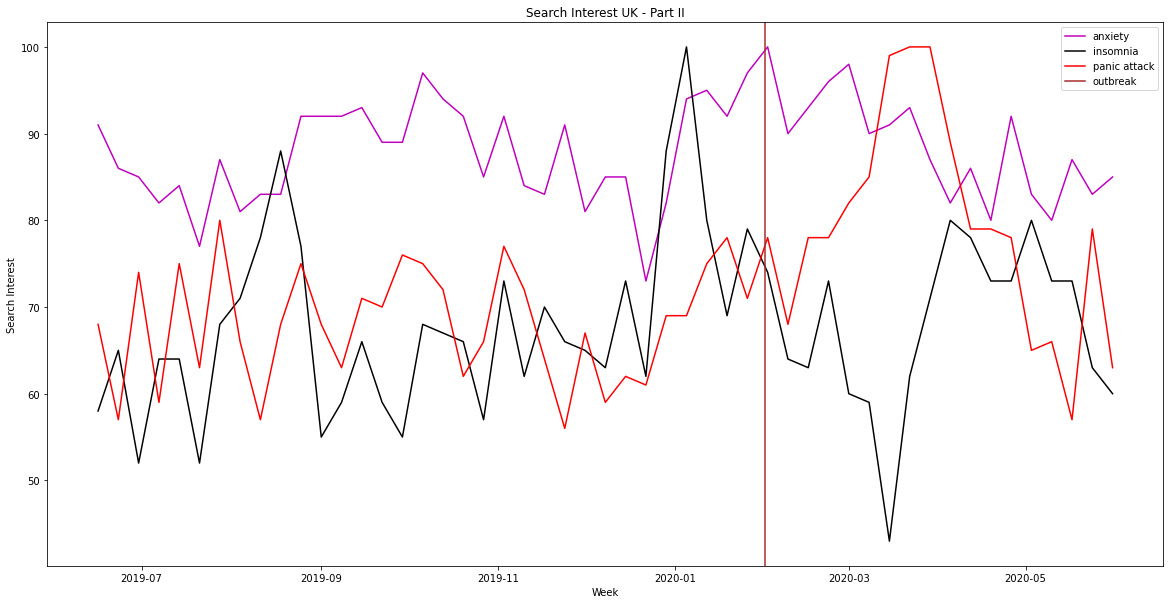

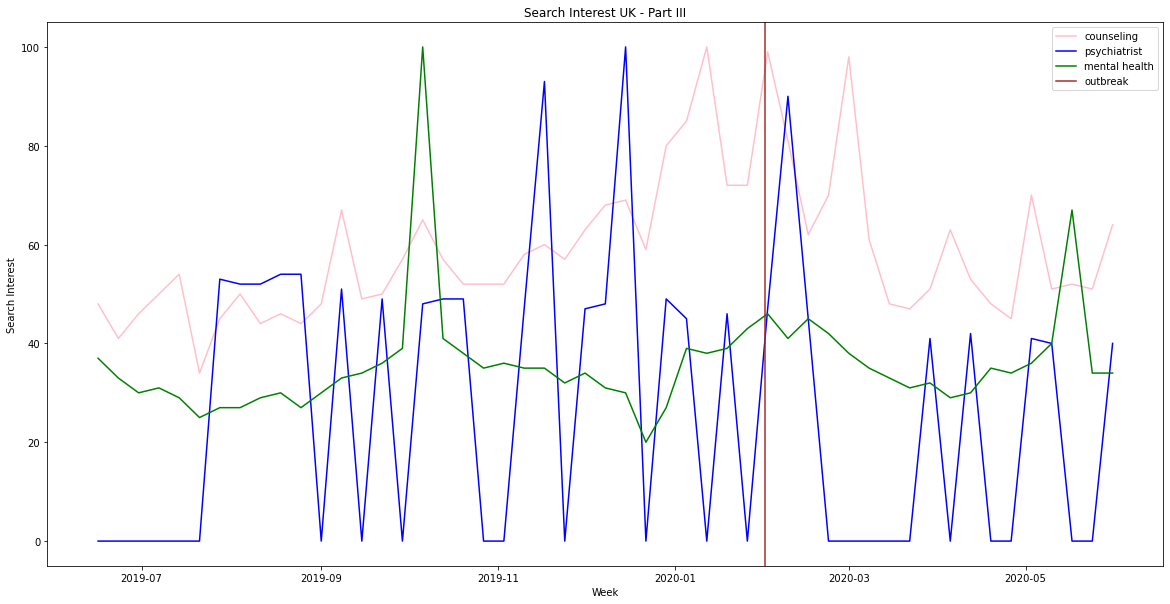

In [17]:
# Plot the search interest in UK.
plt.figure(figsize=(20, 10))
plt.plot(uk_data.index, uk_data['depression'], color='gray')
plt.plot(uk_data.index, uk_data['ocd'], color='y')
plt.plot(uk_data.index, uk_data['obsessive compulsive disorder'], color='orange')
plt.axvline(x='2020-02', color='brown')

plt.legend(['depression', 'ocd', 'obsessive compulsive disorder', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest UK - Part I');

plt.figure(figsize=(20, 10))
plt.plot(uk_data.index, uk_data['anxiety'], color='m')
plt.plot(uk_data.index, uk_data['insomnia'], color='black')
plt.plot(uk_data.index, uk_data['panic attack'], color='r')
plt.axvline(x='2020-02', color='brown')

plt.legend(['anxiety', 'insomnia', 'panic attack', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest UK - Part II');

plt.figure(figsize=(20, 10))
plt.plot(uk_data.index, uk_data['counseling'], color='pink')
plt.plot(uk_data.index, uk_data['psychiatrist'], color='blue')
plt.plot(uk_data.index, uk_data['mental health'], color='green')
plt.axvline(x='2020-02', color='brown')

plt.legend(['counseling', 'psychiatrist', 'mental health', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest UK - Part III');

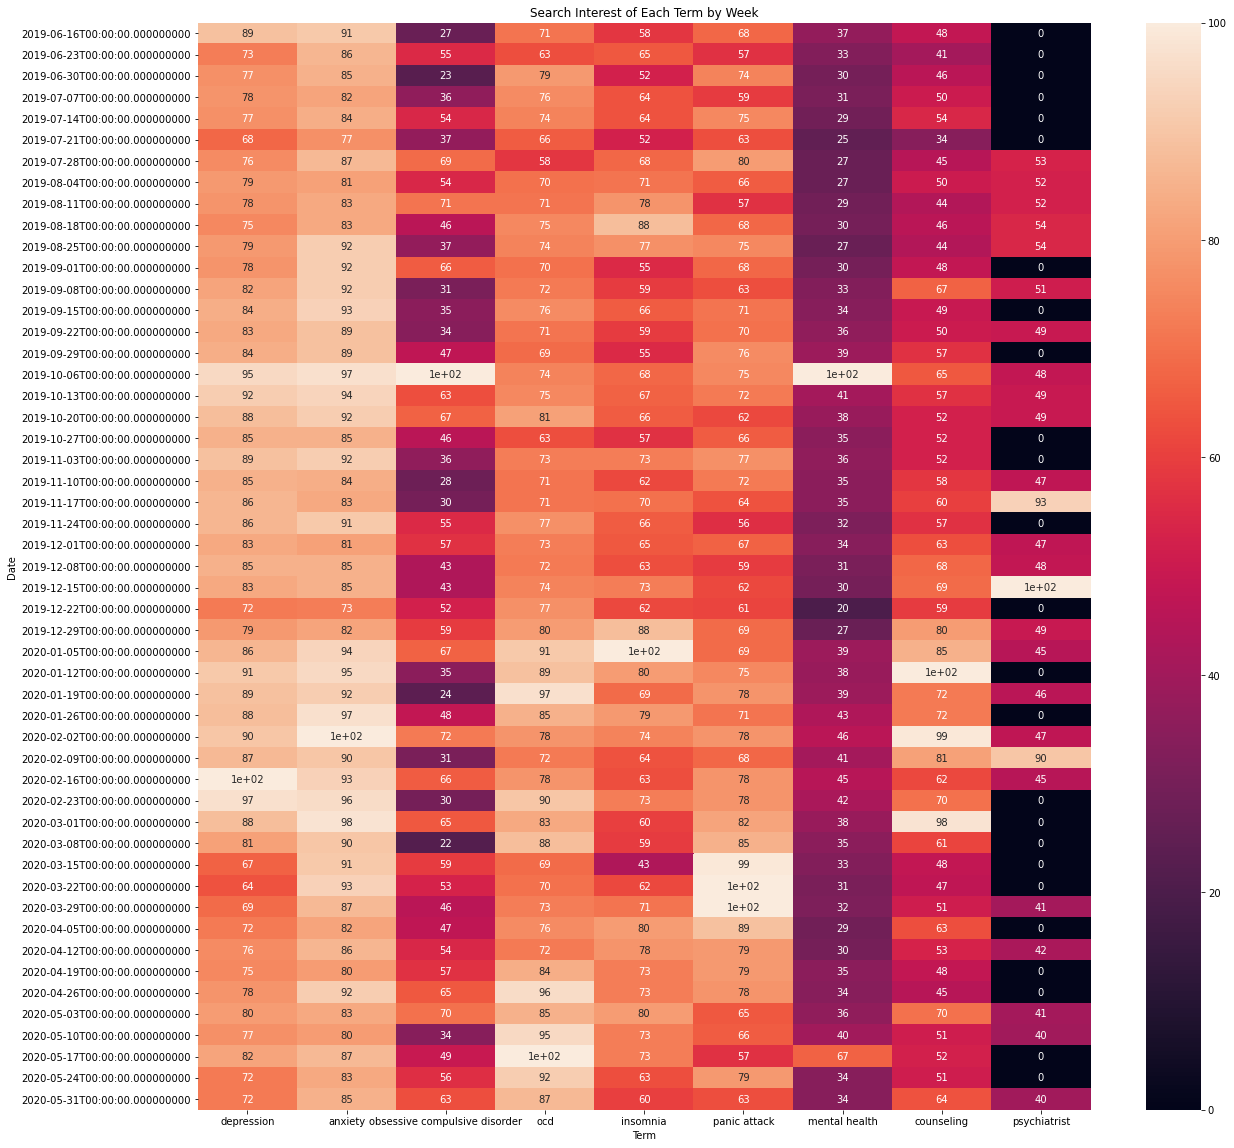

In [18]:
plt.figure(figsize=(20, 20))
plt.title("Search Interest of Each Term by Week")
sns.heatmap(data=uk_data, annot=True)
plt.xlabel("Term");
plt.ylabel("Date");

In [19]:
maximum_peaks = nump.max(uk_data, axis=0)
maximum_dates = [datetime.fromtimestamp(uk_data.index[uk_data[t] == maximum_peaks[t]][0].value / 1000000000) for t in terms]
print("The maximum peak of each term:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] +"  " + str(maximum_dates[i])))

The maximum peak of each term:
                             depression  2020-02-16 00:00:00                              
                               anxiety  2020-02-02 00:00:00                               
                    obsessive compulsive disorder  2019-10-06 00:00:00                    
                                 ocd  2020-05-17 00:00:00                                 
                              insomnia  2020-01-05 00:00:00                               
                            panic attack  2020-03-22 00:00:00                             
                            mental health  2019-10-06 00:00:00                            
                             counseling  2020-01-12 00:00:00                              
                            psychiatrist  2019-12-15 00:00:00                             


Peak before the outbreak: "obsessive compulsive disorder", "insomnia", "mental health", "counseling", "psychiatrist"

Peak after the outbreak: "depression", "anxiety", "ocd", "panic attack"

In [20]:
overall_average = nump.average(uk_data, axis=0)
before_average = nump.average(uk_data.loc[uk_data.index < '2020-01-31'], axis=0)
after_average = nump.average(uk_data.loc[uk_data.index >= '2020-01-31'], axis=0)
print("The average interest of each term over the 12 months:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % overall_average[i]))
print()
          
print("The average interest of each term before Jan, 31, 2020:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % before_average[i]))
print()

print("The average interest of each term after Jan, 31, 2020:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % after_average[i]))  
print()

The average interest of each term over the 12 months:
                                   depression    81.35                                    
                                     anxiety    87.92                                     
                          obsessive compulsive disorder    49.29                          
                                       ocd    77.37                                       
                                    insomnia    67.86                                     
                                  panic attack    71.92                                   
                                  mental health    35.92                                  
                                   counseling    58.98                                    
                                  psychiatrist    26.90                                   

The average interest of each term before Jan, 31, 2020:
                                   depression    82.48                

In [21]:
uk_diff = after_average - before_average

In [22]:
print("The average interest of each term after the outbreak changed by:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "  " + "%.2f" % (100 * (after_average[i] - before_average[i]) / before_average[i]) + "%"))

The average interest of each term after the outbreak changed by:
                                    depression  -3.89%                                    
                                      anxiety  1.32%                                      
                           obsessive compulsive disorder  9.30%                           
                                       ocd  10.98%                                        
                                     insomnia  0.06%                                      
                                   panic attack  16.21%                                   
                                   mental health  8.72%                                   
                                    counseling  7.83%                                     
                                  psychiatrist  -28.23%                                   


Average search interest increased after the outbreak: "anxiety", "obsessive compulsive disorder", "ocd", "insomnia", "panic attack", "mental health", "counseling"

Average search interest decreased after the outbreak: "depression", "psychiatrist"

In [23]:
overall_var = nump.var(uk_data, axis=0)
before_var = nump.var(uk_data.loc[uk_data.index < '2020-01-31'], axis=0)
after_var = nump.var(uk_data.loc[uk_data.index >= '2020-01-31'], axis=0)
print("The variance of each term over the 12 months:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % overall_var[i]))
print()
          
print("The variance of each term before Jan, 31:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % before_var[i]))
print()

print("The variance of each term after Jan, 31:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % after_var[i]))  
print()

The variance of each term over the 12 months:
                                   depression    59.68                                    
                                     anxiety    33.48                                     
                         obsessive compulsive disorder    255.50                          
                                       ocd    84.90                                       
                                    insomnia    102.35                                    
                                  panic attack    107.72                                  
                                 mental health    129.72                                  
                                   counseling    213.67                                   
                                  psychiatrist    820.01                                  

The variance of each term before Jan, 31:
                                   depression    37.40                                    
 

**Italy**

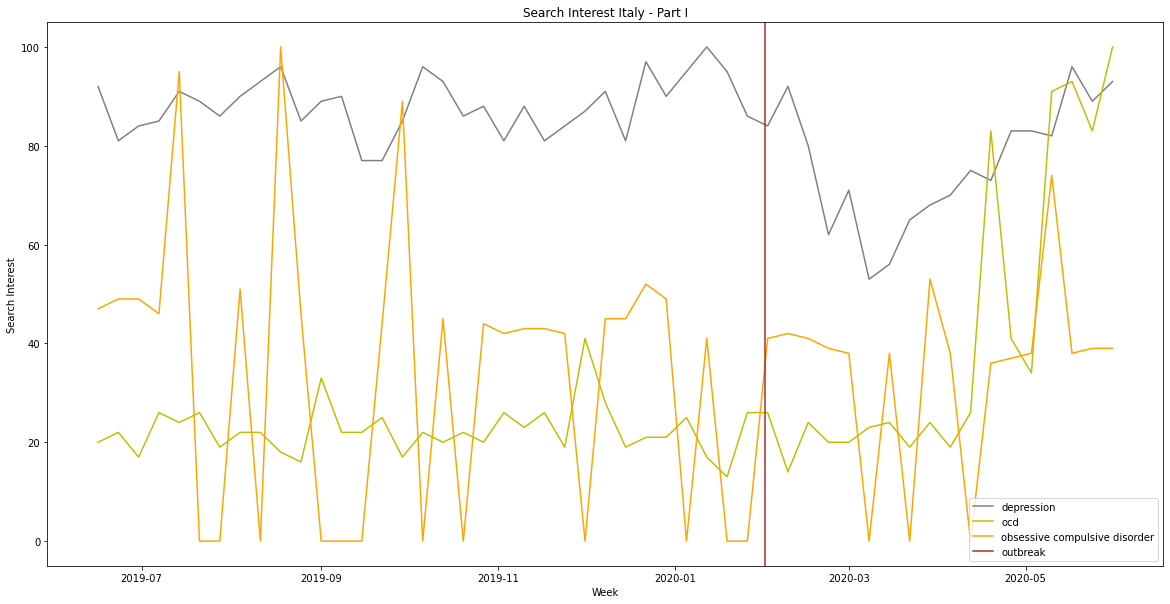

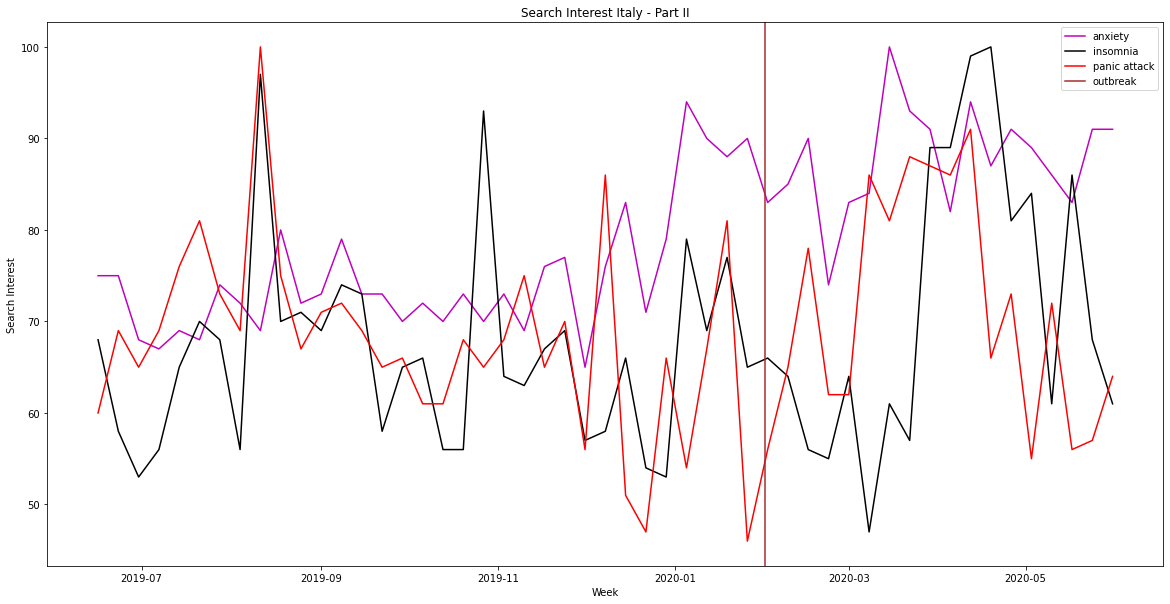

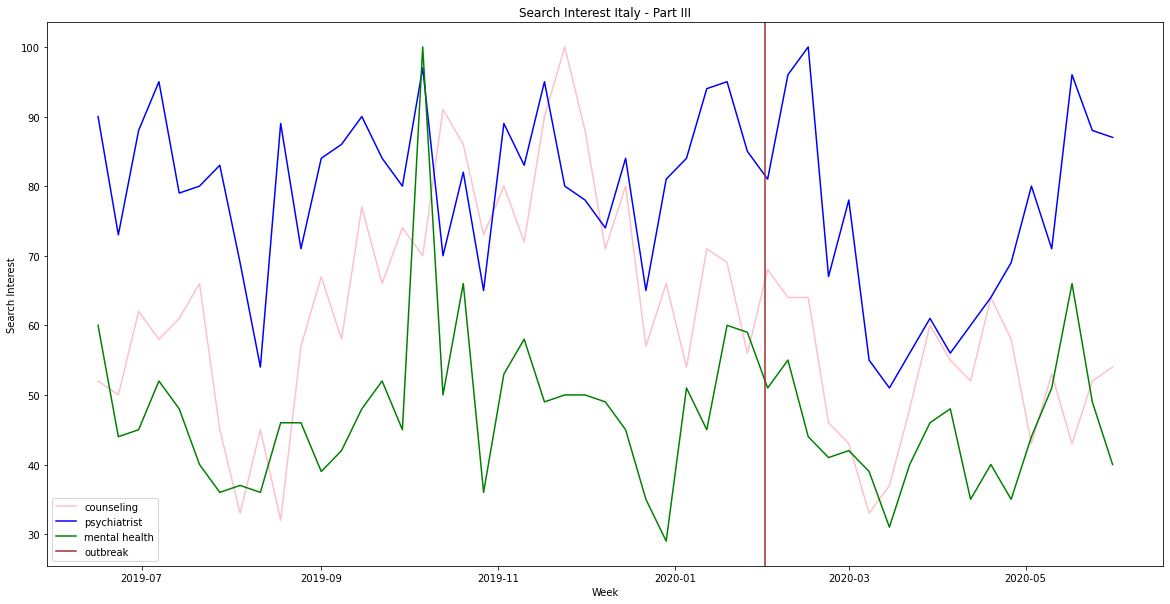

In [24]:
# Plot the search interest in Italy.
plt.figure(figsize=(20, 10))
plt.plot(italy_data.index, italy_data['depression'], color='gray')
plt.plot(italy_data.index, italy_data['ocd'], color='y')
plt.plot(italy_data.index, italy_data['obsessive compulsive disorder'], color='orange')
plt.axvline(x='2020-02', color='brown')

plt.legend(['depression', 'ocd', 'obsessive compulsive disorder', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Italy - Part I');

plt.figure(figsize=(20, 10))
plt.plot(italy_data.index, italy_data['anxiety'], color='m')
plt.plot(italy_data.index, italy_data['insomnia'], color='black')
plt.plot(italy_data.index, italy_data['panic attack'], color='r')
plt.axvline(x='2020-02', color='brown')

plt.legend(['anxiety', 'insomnia', 'panic attack', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Italy - Part II');

plt.figure(figsize=(20, 10))
plt.plot(italy_data.index, italy_data['counseling'], color='pink')
plt.plot(italy_data.index, italy_data['psychiatrist'], color='blue')
plt.plot(italy_data.index, italy_data['mental health'], color='green')
plt.axvline(x='2020-02', color='brown')

plt.legend(['counseling', 'psychiatrist', 'mental health', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Italy - Part III');

In [25]:
plt.figure(figsize=(20, 20))
plt.title("Search Interest of Each Term by Week")
sns.heatmap(data=italy_data, annot=True)
plt.xlabel("Term");
plt.ylabel("Date");

In [26]:
maximum_peaks = nump.max(italy_data, axis=0)
maximum_dates = [datetime.fromtimestamp(italy_data.index[italy_data[t] == maximum_peaks[t]][0].value / 1000000000) for t in terms]
print("The maximum peak of each term:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] +"  " + str(maximum_dates[i])))

The maximum peak of each term:
                             depression  2020-01-12 00:00:00                              
                               anxiety  2020-03-15 00:00:00                               
                    obsessive compulsive disorder  2019-08-18 00:00:00                    
                                 ocd  2020-05-31 00:00:00                                 
                              insomnia  2020-04-19 00:00:00                               
                            panic attack  2019-08-11 00:00:00                             
                            mental health  2019-10-06 00:00:00                            
                             counseling  2019-11-24 00:00:00                              
                            psychiatrist  2020-02-16 00:00:00                             


Peak before the outbreak: "depression", "obsessive compulsive disorder", "panic attack", "mental health", "counseling"

Peak after the outbreak: "anxiety", "ocd", "insomnia", "psychiatrist"

In [27]:
overall_average = nump.average(italy_data, axis=0)
before_average = nump.average(italy_data.loc[italy_data.index < '2020-01-31'], axis=0)
after_average = nump.average(italy_data.loc[italy_data.index >= '2020-01-31'], axis=0)
print("The average interest of each term over the 12 months:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % overall_average[i]))
print()
          
print("The average interest of each term before Jan, 31, 2020:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % before_average[i]))
print()

print("The average interest of each term after Jan, 31, 2020:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % after_average[i]))  
print()

The average interest of each term over the 12 months:
                                   depression    84.00                                    
                                     anxiety    79.41                                     
                          obsessive compulsive disorder    34.08                          
                                       ocd    29.49                                       
                                    insomnia    68.06                                     
                                  panic attack    69.00                                   
                                  mental health    47.02                                  
                                   counseling    61.06                                    
                                  psychiatrist    78.67                                   

The average interest of each term before Jan, 31, 2020:
                                   depression    88.15                

In [28]:
italy_diff = after_average - before_average

In [29]:
print("The average interest of each term after the outbreak changed by:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "  " + "%.2f" % (100 * (after_average[i] - before_average[i]) / before_average[i]) + "%"))

The average interest of each term after the outbreak changed by:
                                   depression  -13.34%                                    
                                     anxiety  16.91%                                      
                           obsessive compulsive disorder  4.50%                           
                                       ocd  89.28%                                        
                                     insomnia  8.17%                                      
                                   panic attack  5.45%                                    
                                  mental health  -8.73%                                   
                                   counseling  -21.09%                                    
                                  psychiatrist  -10.51%                                   


Average search interest increased after the outbreak: "anxiety", "obsessive compulsive disorder", "ocd", "insomnia", "panic attack"

Average search interest decreased after the outbreak: "depression", "mental health", "counseling", "psychiatrist"

In [30]:
overall_var = nump.var(italy_data, axis=0)
before_var = nump.var(italy_data.loc[italy_data.index < '2020-01-31'], axis=0)
after_var = nump.var(italy_data.loc[italy_data.index >= '2020-01-31'], axis=0)
print("The variance of each term over the 12 months:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % overall_var[i]))
print()
          
print("The variance of each term before Jan, 31:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % before_var[i]))
print()

print("The variance of each term after Jan, 31:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % after_var[i]))  
print()

The variance of each term over the 12 months:
                                   depression    105.41                                   
                                     anxiety    79.73                                     
                         obsessive compulsive disorder    654.50                          
                                      ocd    430.92                                       
                                    insomnia    159.66                                    
                                  panic attack    128.31                                  
                                 mental health    123.63                                  
                                   counseling    236.68                                   
                                  psychiatrist    160.73                                  

The variance of each term before Jan, 31:
                                   depression    32.07                                    
 

**Japan**

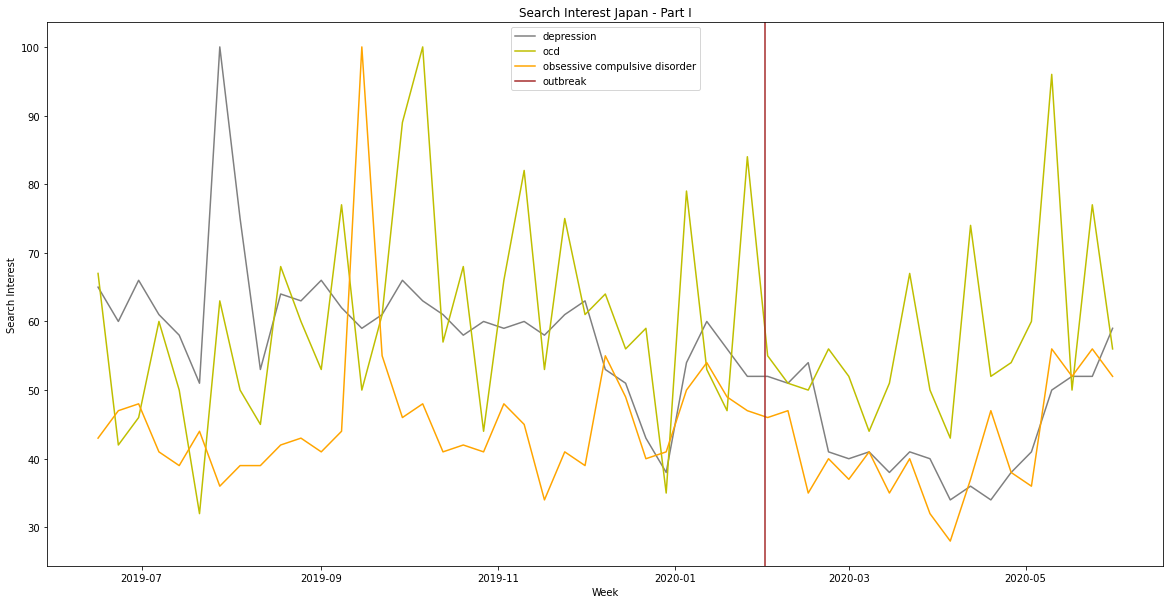

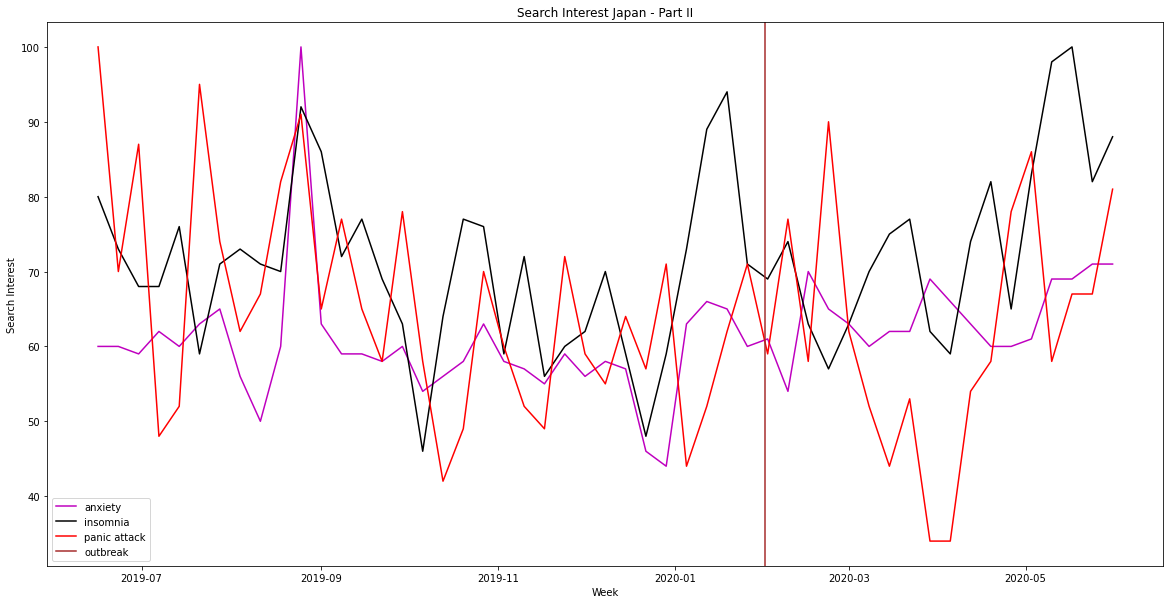

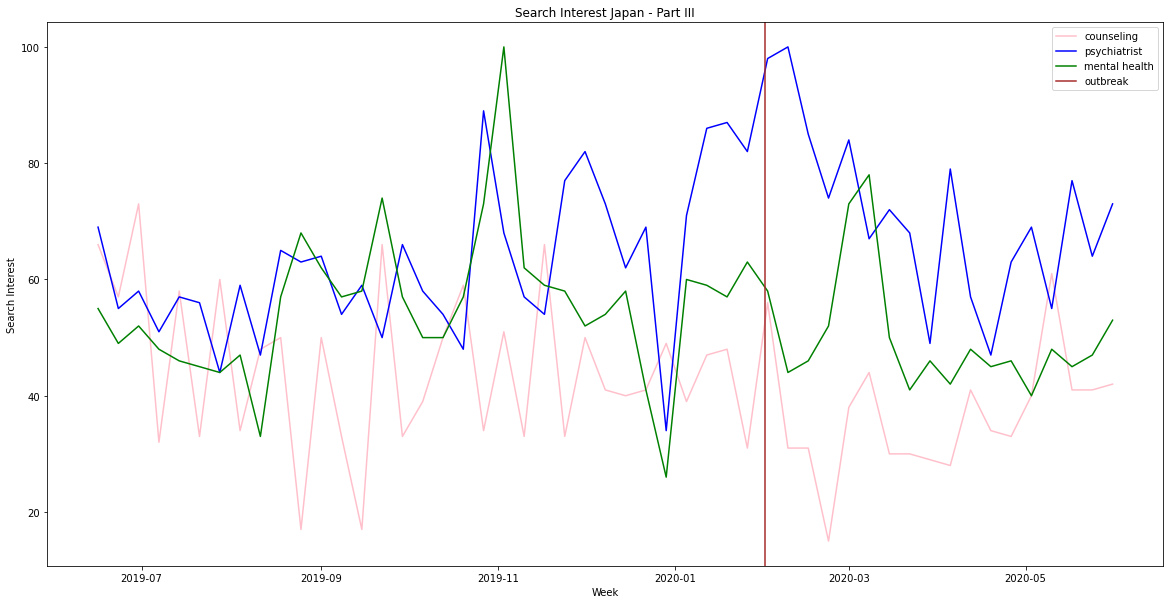

In [31]:
# Plot the search interest in Japan.
plt.figure(figsize=(20, 10))
plt.plot(japan_data.index, japan_data['depression'], color='gray')
plt.plot(japan_data.index, japan_data['ocd'], color='y')
plt.plot(japan_data.index, japan_data['obsessive compulsive disorder'], color='orange')
plt.axvline(x='2020-02', color='brown')

plt.legend(['depression', 'ocd', 'obsessive compulsive disorder', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Japan - Part I');

plt.figure(figsize=(20, 10))
plt.plot(japan_data.index, japan_data['anxiety'], color='m')
plt.plot(japan_data.index, japan_data['insomnia'], color='black')
plt.plot(japan_data.index, japan_data['panic attack'], color='r')
plt.axvline(x='2020-02', color='brown')

plt.legend(['anxiety', 'insomnia', 'panic attack', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Japan - Part II');

plt.figure(figsize=(20, 10))
plt.plot(japan_data.index, japan_data['counseling'], color='pink')
plt.plot(japan_data.index, japan_data['psychiatrist'], color='blue')
plt.plot(japan_data.index, japan_data['mental health'], color='green')
plt.axvline(x='2020-02', color='brown')

plt.legend(['counseling', 'psychiatrist', 'mental health', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Japan - Part III');

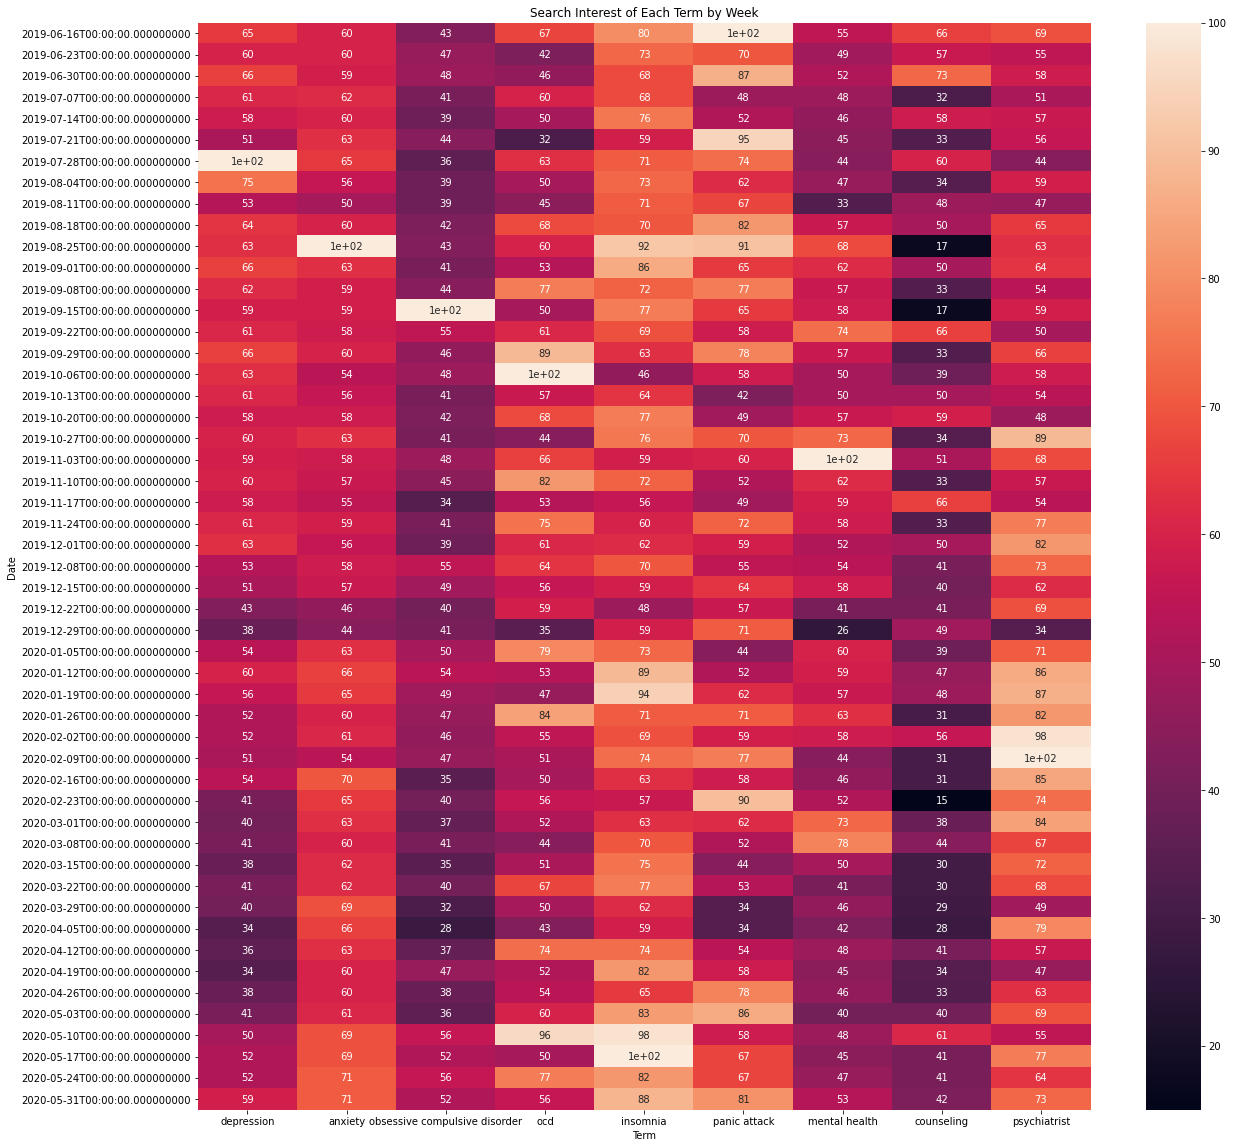

In [32]:
plt.figure(figsize=(20, 20))
plt.title("Search Interest of Each Term by Week")
sns.heatmap(data=japan_data, annot=True)
plt.xlabel("Term");
plt.ylabel("Date");

In [33]:
maximum_peaks = nump.max(japan_data, axis=0)
maximum_dates = [datetime.fromtimestamp(japan_data.index[japan_data[t] == maximum_peaks[t]][0].value / 1000000000) for t in terms]
print("The maximum peak of each term:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] +"  " + str(maximum_dates[i])))

The maximum peak of each term:
                             depression  2019-07-28 00:00:00                              
                               anxiety  2019-08-25 00:00:00                               
                    obsessive compulsive disorder  2019-09-15 00:00:00                    
                                 ocd  2019-10-06 00:00:00                                 
                              insomnia  2020-05-17 00:00:00                               
                            panic attack  2019-06-16 00:00:00                             
                            mental health  2019-11-03 00:00:00                            
                             counseling  2019-06-30 00:00:00                              
                            psychiatrist  2020-02-09 00:00:00                             


Peak before the outbreak: "depression", "anxiety", "obsessive compulsive disorder", "ocd", "panic attack", "mental health", "counseling"

Peak after the outbreak: "insomnia", "psychiatrist"

In [34]:
overall_average = nump.average(japan_data, axis=0)
before_average = nump.average(japan_data.loc[japan_data.index < '2020-01-31'], axis=0)
after_average = nump.average(japan_data.loc[japan_data.index >= '2020-01-31'], axis=0)
print("The average interest of each term over the 12 months:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % overall_average[i]))
print()
          
print("The average interest of each term before Jan, 31, 2020:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % before_average[i]))
print()

print("The average interest of each term after Jan, 31, 2020:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % after_average[i]))  
print()

The average interest of each term over the 12 months:
                                   depression    54.39                                    
                                     anxiety    61.27                                     
                          obsessive compulsive disorder    44.43                          
                                       ocd    59.49                                       
                                    insomnia    71.45                                     
                                  panic attack    64.12                                   
                                  mental health    53.59                                  
                                   counseling    42.02                                    
                                  psychiatrist    65.67                                   

The average interest of each term before Jan, 31, 2020:
                                   depression    60.00                

In [35]:
japan_diff = after_average - before_average

In [36]:
print("The average interest of each term after the outbreak changed by:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "  " + "%.2f" % (100 * (after_average[i] - before_average[i]) / before_average[i]) + "%"))

The average interest of each term after the outbreak changed by:
                                   depression  -26.48%                                    
                                      anxiety  7.64%                                      
                          obsessive compulsive disorder  -8.39%                           
                                       ocd  -4.66%                                        
                                     insomnia  6.75%                                      
                                   panic attack  -5.53%                                   
                                  mental health  -9.69%                                   
                                   counseling  -17.51%                                    
                                   psychiatrist  13.56%                                   


Average search interest increased after the outbreak: "anxiety", "insomnia", "psychiatrist"

Average search interest decreased after the outbreak: "depression", "obsessive compulsive disorder", "ocd", "panic attack", "mental health", "counseling"

In [37]:
overall_var = nump.var(japan_data, axis=0)
before_var = nump.var(japan_data.loc[japan_data.index < '2020-01-31'], axis=0)
after_var = nump.var(japan_data.loc[japan_data.index >= '2020-01-31'], axis=0)
print("The variance of each term over the 12 months:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % overall_var[i]))
print()
          
print("The variance of each term before Jan, 31:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % before_var[i]))
print()

print("The variance of each term after Jan, 31:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % after_var[i]))  
print()

The variance of each term over the 12 months:
                                   depression    139.57                                   
                                     anxiety    59.85                                     
                         obsessive compulsive disorder    102.13                          
                                      ocd    210.05                                       
                                    insomnia    135.78                                    
                                  panic attack    222.65                                  
                                 mental health    143.14                                  
                                   counseling    169.55                                   
                                  psychiatrist    196.50                                  

The variance of each term before Jan, 31:
                                   depression    96.12                                    
 

**South Korea**

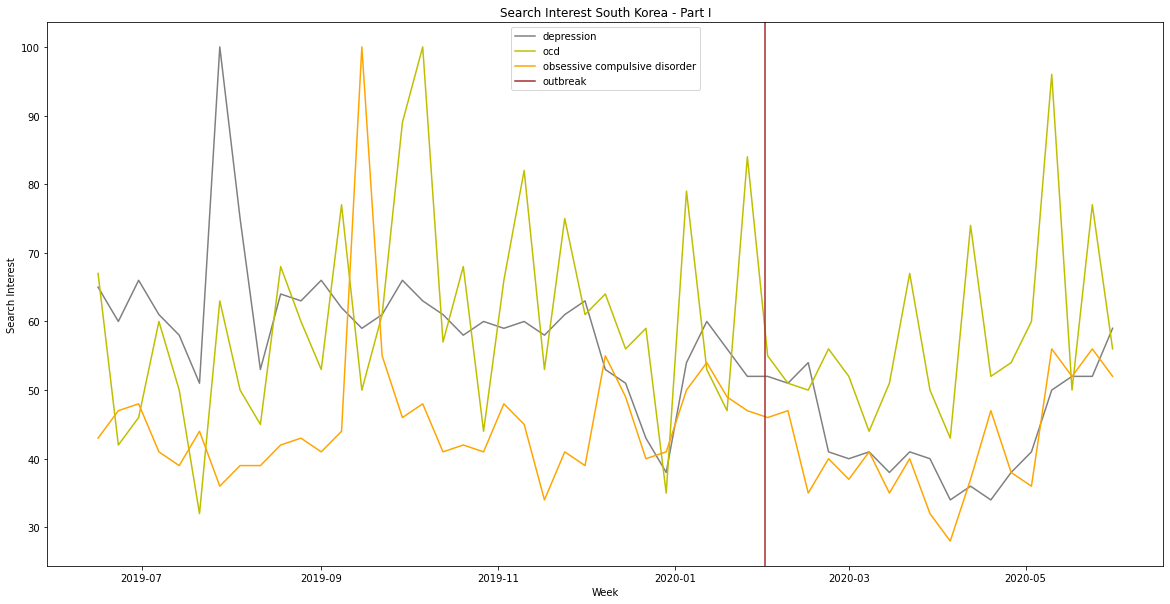

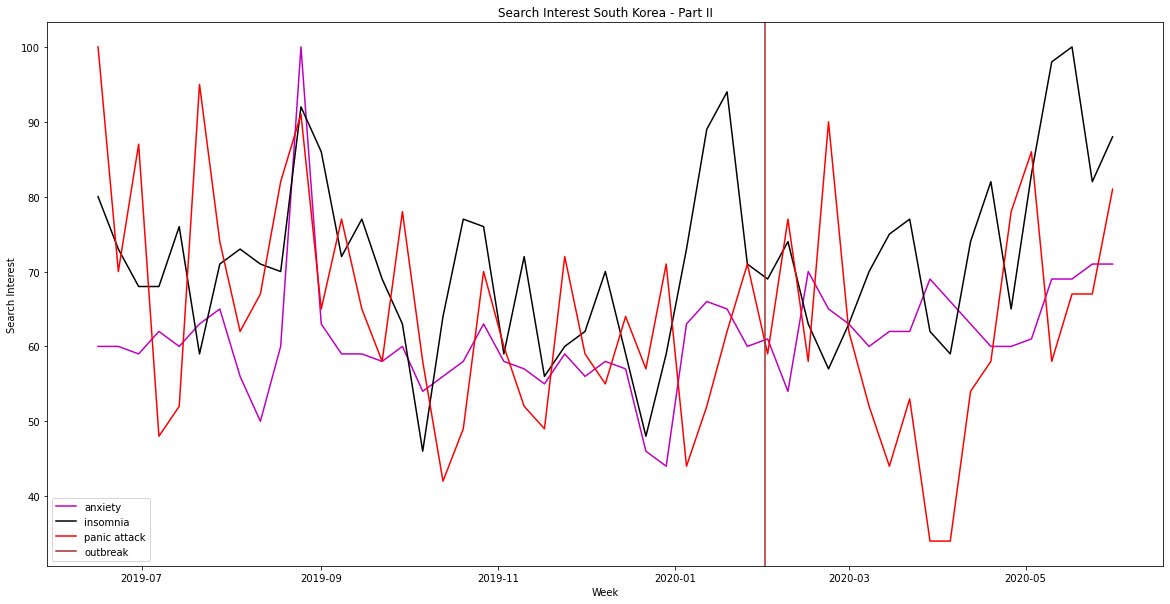

In [38]:
# Plot the search interest in South Korea.
plt.figure(figsize=(20, 10))
plt.plot(sk_data.index, sk_data['depression'], color='gray')
plt.plot(sk_data.index, sk_data['ocd'], color='y')
plt.plot(sk_data.index, sk_data['obsessive compulsive disorder'], color='orange')
plt.axvline(x='2020-02', color='brown')

plt.legend(['depression', 'ocd', 'obsessive compulsive disorder', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest South Korea - Part I');

plt.figure(figsize=(20, 10))
plt.plot(sk_data.index, sk_data['anxiety'], color='m')
plt.plot(sk_data.index, sk_data['insomnia'], color='black')
plt.plot(sk_data.index, sk_data['panic attack'], color='r')
plt.axvline(x='2020-02', color='brown')

plt.legend(['anxiety', 'insomnia', 'panic attack', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest South Korea - Part II');

plt.figure(figsize=(20, 10))
plt.plot(sk_data.index, sk_data['counseling'], color='pink')
plt.plot(sk_data.index, sk_data['psychiatrist'], color='blue')
plt.plot(sk_data.index, sk_data['mental health'], color='green')
plt.axvline(x='2020-02', color='brown')

plt.legend(['counseling', 'psychiatrist', 'mental health', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest South Korea - Part III');

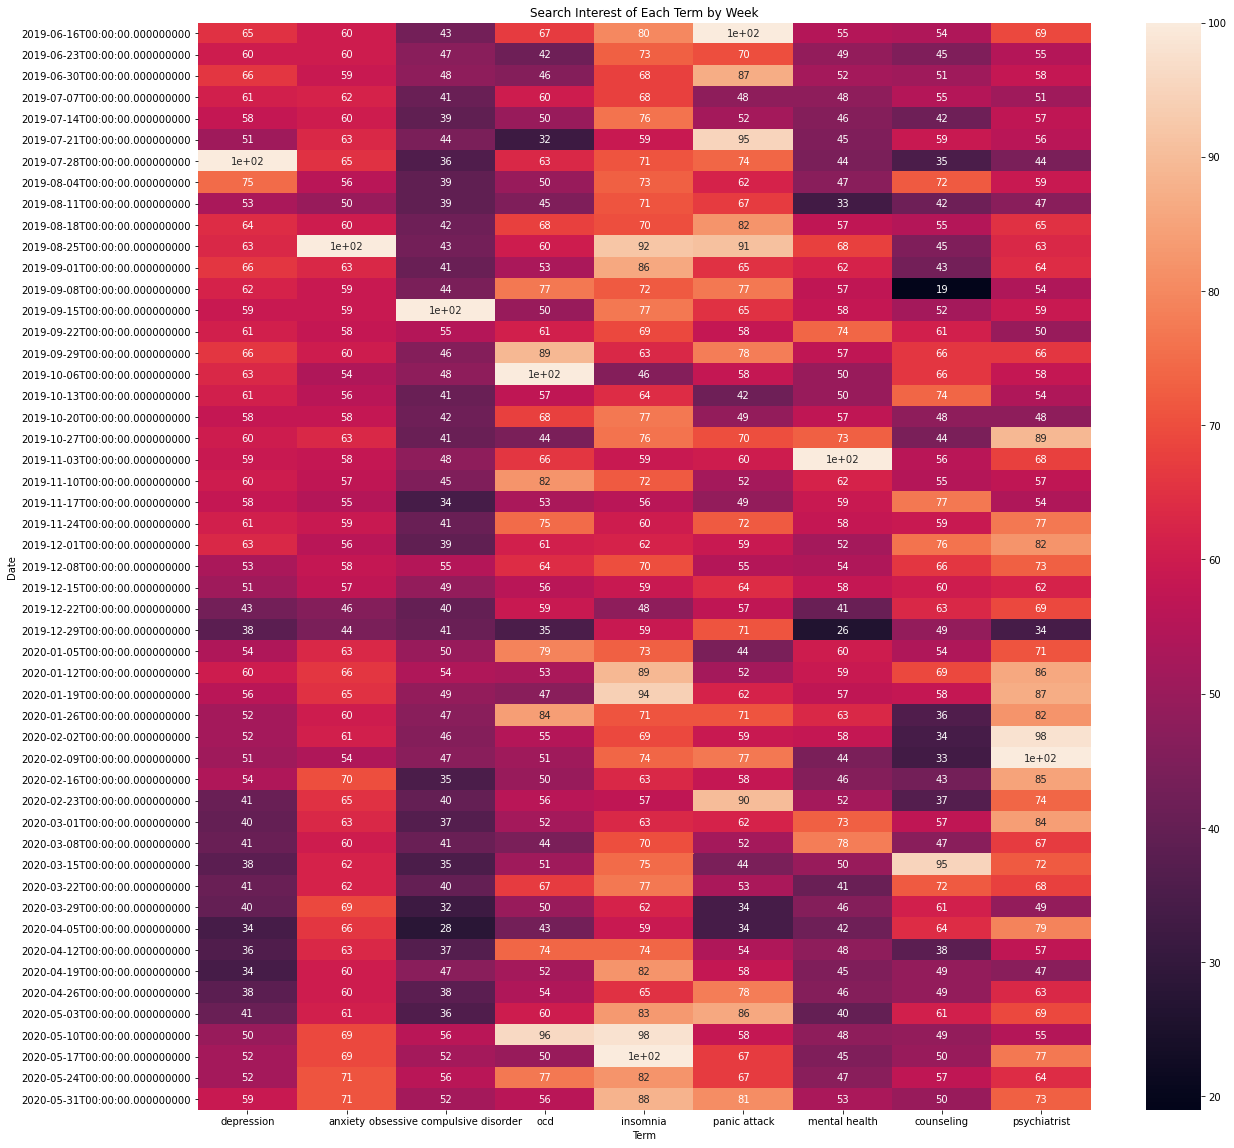

In [39]:
plt.figure(figsize=(20, 20))
plt.title("Search Interest of Each Term by Week")
sns.heatmap(data=sk_data, annot=True)
plt.xlabel("Term");
plt.ylabel("Date");

In [40]:
maximum_peaks = nump.max(sk_data, axis=0)
maximum_dates = [datetime.fromtimestamp(sk_data.index[sk_data[t] == maximum_peaks[t]][0].value / 1000000000) for t in terms]
print("The maximum peak of each term:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] +"  " + str(maximum_dates[i])))

The maximum peak of each term:
                             depression  2019-07-28 00:00:00                              
                               anxiety  2019-08-25 00:00:00                               
                    obsessive compulsive disorder  2019-09-15 00:00:00                    
                                 ocd  2019-10-06 00:00:00                                 
                              insomnia  2020-05-17 00:00:00                               
                            panic attack  2019-06-16 00:00:00                             
                            mental health  2019-11-03 00:00:00                            
                             counseling  2020-03-15 00:00:00                              
                            psychiatrist  2020-02-09 00:00:00                             


Peak before the outbreak: "depression", "anxiety", "obsessive compulsive disorder", "ocd", "panic attack", "mental health"

Peak after the outbreak: "counseling", "psychiatrist"

In [41]:
overall_average = nump.average(sk_data, axis=0)
before_average = nump.average(sk_data.loc[sk_data.index < '2020-01-31'], axis=0)
after_average = nump.average(sk_data.loc[sk_data.index >= '2020-01-31'], axis=0)
print("The average interest of each term over the 12 months:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % overall_average[i]))
print()
          
print("The average interest of each term before Jan, 31, 2020:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % before_average[i]))
print()

print("The average interest of each term after Jan, 31, 2020:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % after_average[i]))  
print()

The average interest of each term over the 12 months:
                                   depression    54.39                                    
                                     anxiety    61.27                                     
                          obsessive compulsive disorder    44.43                          
                                       ocd    59.49                                       
                                    insomnia    71.45                                     
                                  panic attack    64.12                                   
                                  mental health    53.59                                  
                                   counseling    53.96                                    
                                  psychiatrist    65.67                                   

The average interest of each term before Jan, 31, 2020:
                                   depression    60.00                

In [42]:
sk_diff = after_average - before_average

In [43]:
print("The average interest of each term after the outbreak changed by:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "  " + "%.2f" % (100 * (after_average[i] - before_average[i]) / before_average[i]) + "%"))

The average interest of each term after the outbreak changed by:
                                   depression  -26.48%                                    
                                      anxiety  7.64%                                      
                          obsessive compulsive disorder  -8.39%                           
                                       ocd  -4.66%                                        
                                     insomnia  6.75%                                      
                                   panic attack  -5.53%                                   
                                  mental health  -9.69%                                   
                                    counseling  -3.97%                                    
                                   psychiatrist  13.56%                                   


Average search interest increased after the outbreak: "anxiety", "insomnia", "psychiatrist"

Average search interest decreased after the outbreak: "depression", "obsessive compulsive disorder", "ocd", "panic attack", "mental health", "counseling"

In [44]:
overall_var = nump.var(sk_data, axis=0)
before_var = nump.var(sk_data.loc[sk_data.index < '2020-01-31'], axis=0)
after_var = nump.var(sk_data.loc[sk_data.index >= '2020-01-31'], axis=0)
print("The variance of each term over the 12 months:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % overall_var[i]))
print()
          
print("The variance of each term before Jan, 31:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % before_var[i]))
print()

print("The variance of each term after Jan, 31:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % after_var[i]))  
print()

The variance of each term over the 12 months:
                                   depression    139.57                                   
                                     anxiety    59.85                                     
                         obsessive compulsive disorder    102.13                          
                                      ocd    210.05                                       
                                    insomnia    135.78                                    
                                  panic attack    222.65                                  
                                 mental health    143.14                                  
                                   counseling    179.84                                   
                                  psychiatrist    196.50                                  

The variance of each term before Jan, 31:
                                   depression    96.12                                    
 

**Iran**

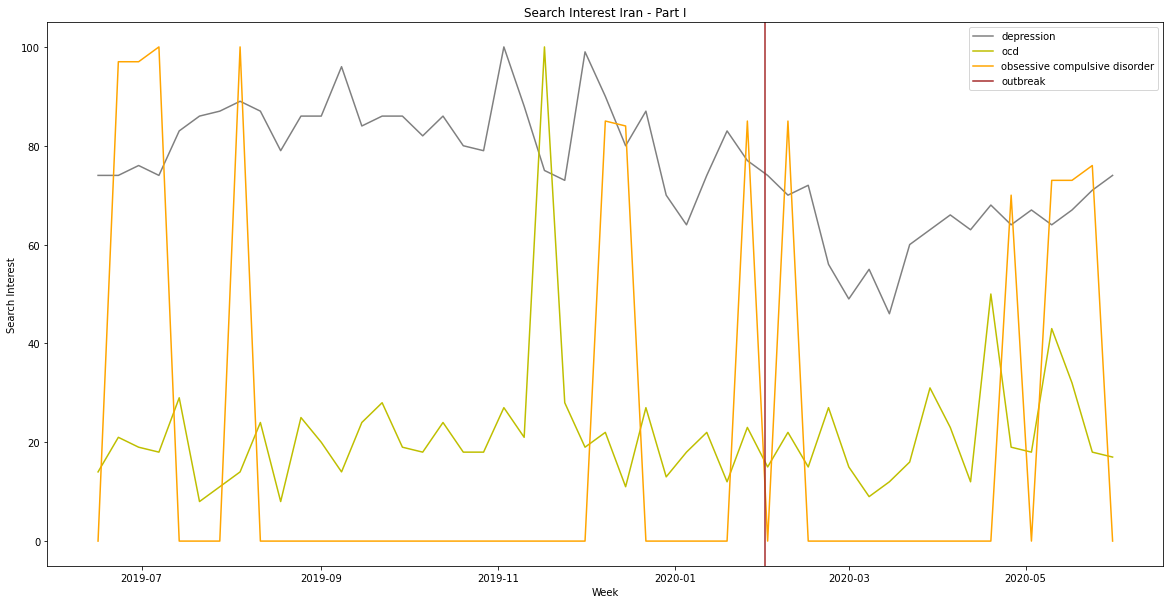

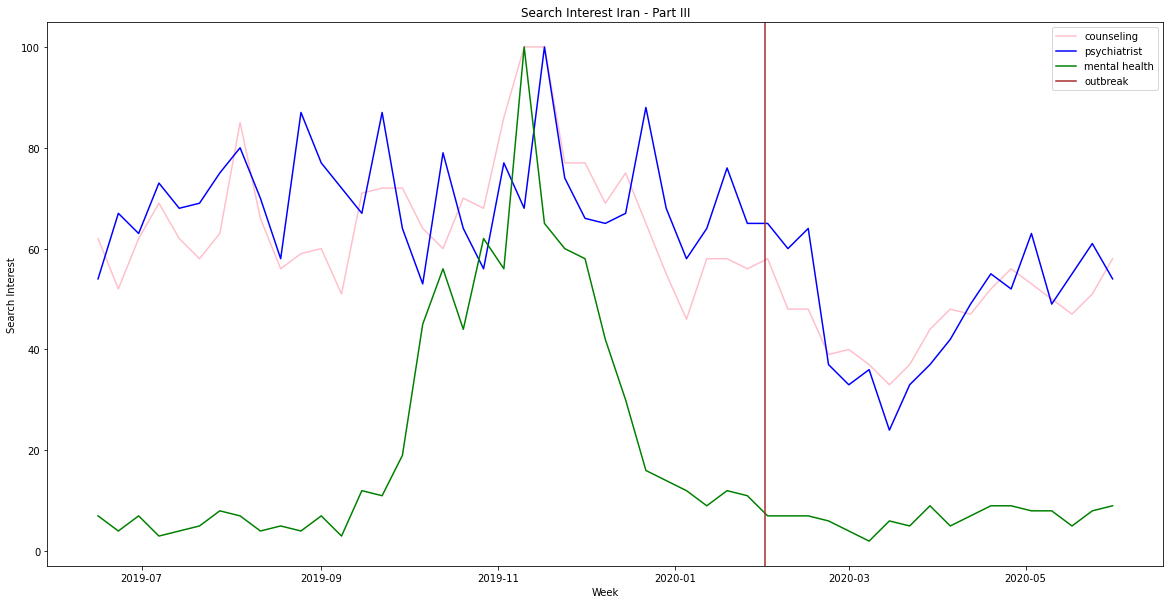

In [45]:
# Plot the search interest in Iran.
plt.figure(figsize=(20, 10))
plt.plot(iran_data.index, iran_data['depression'], color='gray')
plt.plot(iran_data.index, iran_data['ocd'], color='y')
plt.plot(iran_data.index, iran_data['obsessive compulsive disorder'], color='orange')
plt.axvline(x='2020-02', color='brown')

plt.legend(['depression', 'ocd', 'obsessive compulsive disorder', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Iran - Part I');

plt.figure(figsize=(20, 10))
plt.plot(iran_data.index, iran_data['anxiety'], color='m')
plt.plot(iran_data.index, iran_data['insomnia'], color='black')
plt.plot(iran_data.index, iran_data['panic attack'], color='r')
plt.axvline(x='2020-02', color='brown')

plt.legend(['anxiety', 'insomnia', 'panic attack', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Iran - Part II');

plt.figure(figsize=(20, 10))
plt.plot(iran_data.index, iran_data['counseling'], color='pink')
plt.plot(iran_data.index, iran_data['psychiatrist'], color='blue')
plt.plot(iran_data.index, iran_data['mental health'], color='green')
plt.axvline(x='2020-02', color='brown')

plt.legend(['counseling', 'psychiatrist', 'mental health', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Iran - Part III');

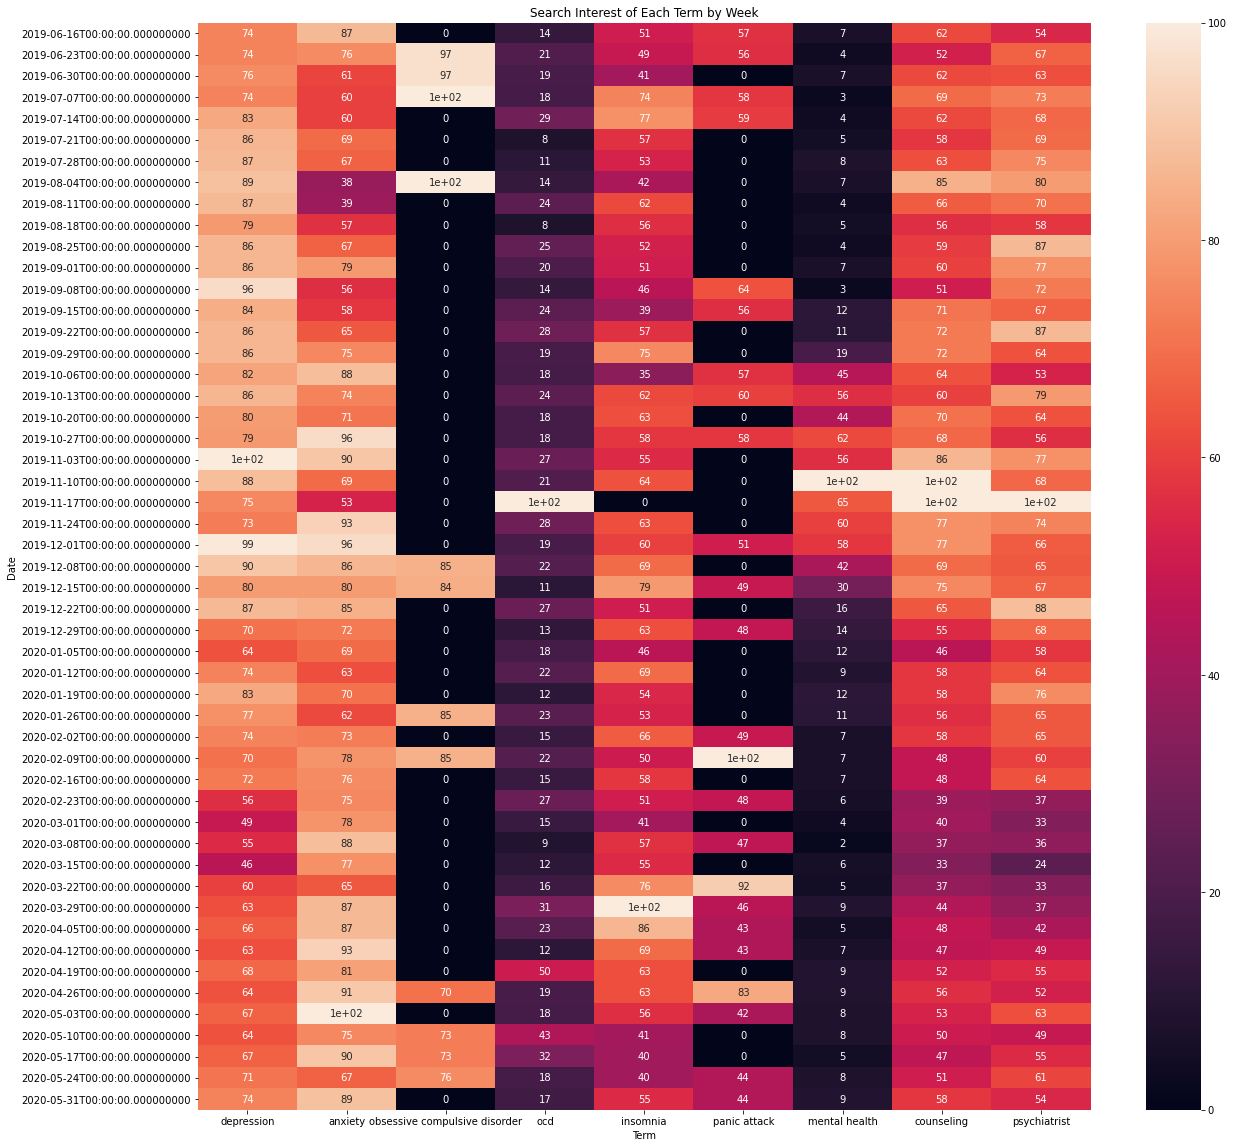

In [46]:
plt.figure(figsize=(20, 20))
plt.title("Search Interest of Each Term by Week")
sns.heatmap(data=iran_data, annot=True)
plt.xlabel("Term");
plt.ylabel("Date");

In [47]:
maximum_peaks = nump.max(iran_data, axis=0)
maximum_dates = [datetime.fromtimestamp(iran_data.index[iran_data[t] == maximum_peaks[t]][0].value / 1000000000) for t in terms]
print("The maximum peak of each term:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] +"  " + str(maximum_dates[i])))

The maximum peak of each term:
                             depression  2019-11-03 00:00:00                              
                               anxiety  2020-05-03 00:00:00                               
                    obsessive compulsive disorder  2019-07-07 00:00:00                    
                                 ocd  2019-11-17 00:00:00                                 
                              insomnia  2020-03-29 00:00:00                               
                            panic attack  2020-02-09 00:00:00                             
                            mental health  2019-11-10 00:00:00                            
                             counseling  2019-11-10 00:00:00                              
                            psychiatrist  2019-11-17 00:00:00                             


Peak before the outbreak: "depression", "obsessive compulsive disorder", "ocd", "mental health", "counseling", "psychiatrist"

Peak after the outbreak: "anxiety", "insomnia", "panic attack"

In [48]:
overall_average = nump.average(iran_data, axis=0)
before_average = nump.average(iran_data.loc[iran_data.index < '2020-01-31'], axis=0)
after_average = nump.average(iran_data.loc[iran_data.index >= '2020-01-31'], axis=0)
print("The average interest of each term over the 12 months:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % overall_average[i]))
print()
          
print("The average interest of each term before Jan, 31, 2020:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % before_average[i]))
print()

print("The average interest of each term after Jan, 31, 2020:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % after_average[i]))  
print()

The average interest of each term over the 12 months:
                                   depression    75.86                                    
                                     anxiety    74.53                                     
                          obsessive compulsive disorder    20.10                          
                                       ocd    21.78                                       
                                    insomnia    56.73                                     
                                  panic attack    26.55                                   
                                  mental health    18.10                                  
                                   counseling    59.80                                    
                                  psychiatrist    62.51                                   

The average interest of each term before Jan, 31, 2020:
                                   depression    82.42                

In [49]:
iran_diff = after_average - before_average

In [50]:
print("The average interest of each term after the outbreak changed by:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "  " + "%.2f" % (100 * (after_average[i] - before_average[i]) / before_average[i]) + "%"))

The average interest of each term after the outbreak changed by:
                                   depression  -22.56%                                    
                                     anxiety  15.62%                                      
                           obsessive compulsive disorder  6.66%                           
                                        ocd  0.74%                                        
                                     insomnia  7.13%                                      
                                   panic attack  85.51%                                   
                                  mental health  -72.34%                                  
                                   counseling  -29.63%                                    
                                  psychiatrist  -31.30%                                   


Average search interest increased after the outbreak: "anxiety", "obsessive compulsive disorder", "ocd", "insomnia", "panic attack"

Average search interest decreased after the outbreak: "depression", "mental health", "counseling", "psychiatrist"

In [51]:
overall_var = nump.var(iran_data, axis=0)
before_var = nump.var(iran_data.loc[iran_data.index < '2020-01-31'], axis=0)
after_var = nump.var(iran_data.loc[iran_data.index >= '2020-01-31'], axis=0)
print("The variance of each term over the 12 months:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % overall_var[i]))
print()
          
print("The variance of each term before Jan, 31:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % before_var[i]))
print()

print("The variance of each term after Jan, 31:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % after_var[i]))  
print()

The variance of each term over the 12 months:
                                   depression    141.06                                   
                                    anxiety    191.66                                     
                         obsessive compulsive disorder    1338.87                         
                                      ocd    185.19                                       
                                    insomnia    226.55                                    
                                  panic attack    897.07                                  
                                 mental health    471.85                                  
                                   counseling    206.24                                   
                                  psychiatrist    230.92                                  

The variance of each term before Jan, 31:
                                   depression    62.73                                    
 

**Canada**

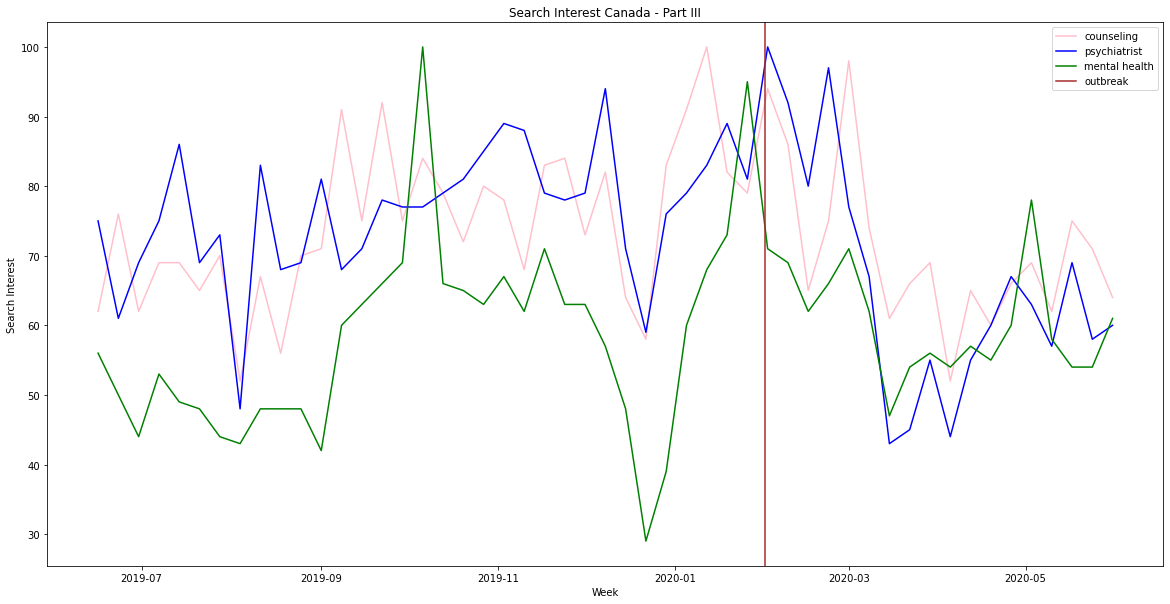

In [52]:
# Plot the search interest in Canada.
plt.figure(figsize=(20, 10))
plt.plot(canada_data.index, canada_data['depression'], color='gray')
plt.plot(canada_data.index, canada_data['ocd'], color='y')
plt.plot(canada_data.index, canada_data['obsessive compulsive disorder'], color='orange')
plt.axvline(x='2020-02', color='brown')

plt.legend(['depression', 'ocd', 'obsessive compulsive disorder', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Canada - Part I');

plt.figure(figsize=(20, 10))
plt.plot(canada_data.index, canada_data['anxiety'], color='m')
plt.plot(canada_data.index, canada_data['insomnia'], color='black')
plt.plot(canada_data.index, canada_data['panic attack'], color='r')
plt.axvline(x='2020-02', color='brown')

plt.legend(['anxiety', 'insomnia', 'panic attack', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Canada - Part II');

plt.figure(figsize=(20, 10))
plt.plot(canada_data.index, canada_data['counseling'], color='pink')
plt.plot(canada_data.index, canada_data['psychiatrist'], color='blue')
plt.plot(canada_data.index, canada_data['mental health'], color='green')
plt.axvline(x='2020-02', color='brown')

plt.legend(['counseling', 'psychiatrist', 'mental health', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Canada - Part III');


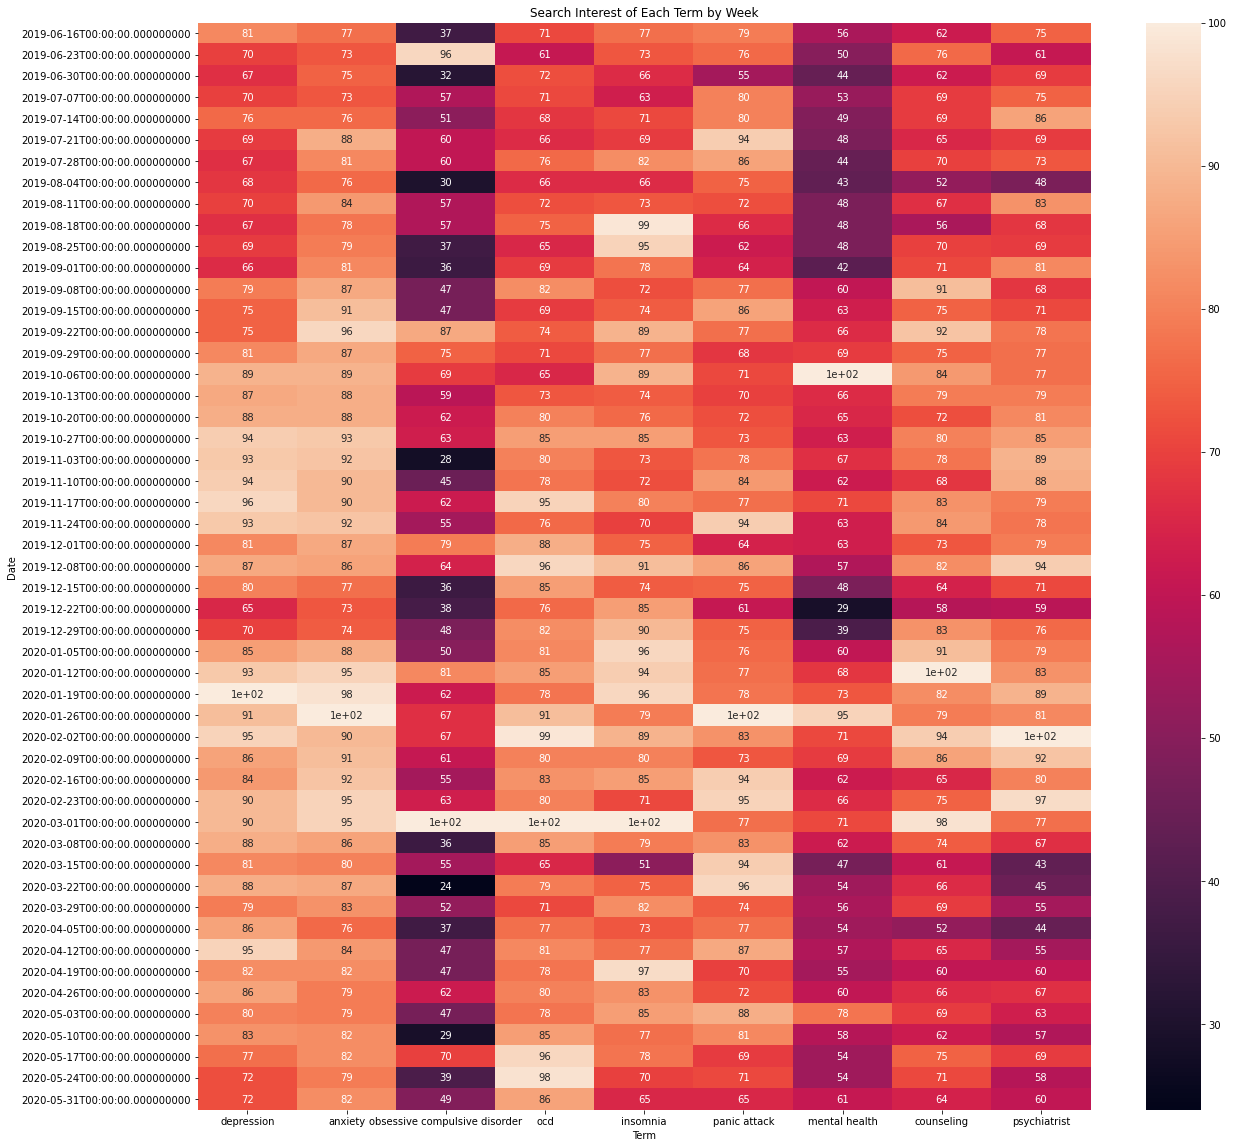

In [53]:
plt.figure(figsize=(20, 20))
plt.title("Search Interest of Each Term by Week")
sns.heatmap(data=canada_data, annot=True)
plt.xlabel("Term");
plt.ylabel("Date");

To compare with the trends of search interest of previous years in case there is a possibility that mental health concern is affected by seasonal causes, I plotted that of from 2016 to 2019 four years for Canada special.

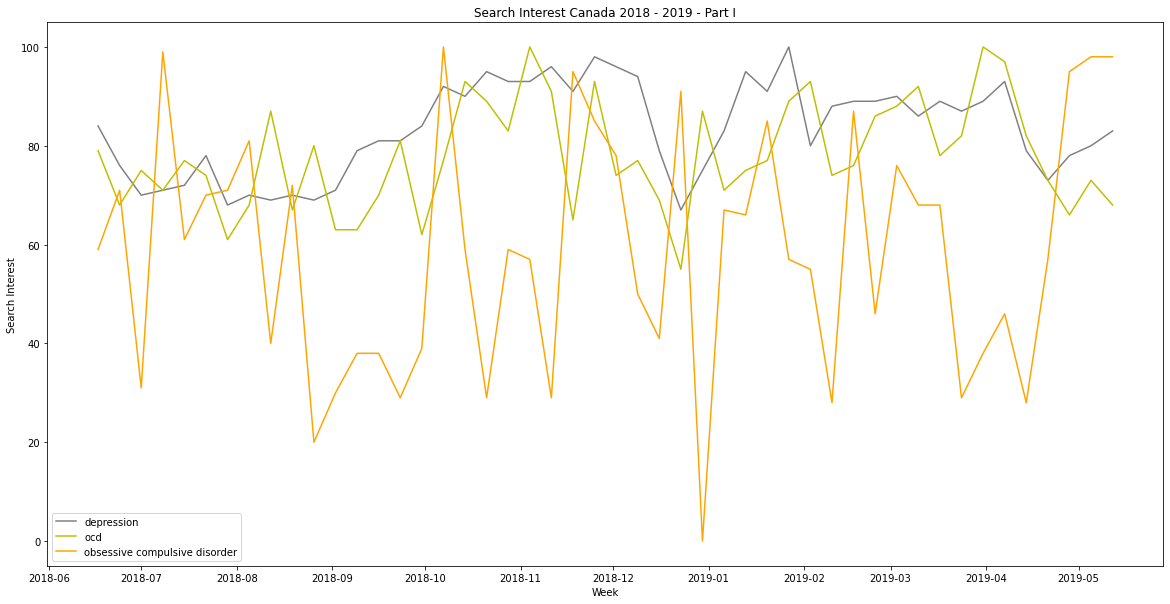

In [54]:
plt.figure(figsize=(20, 10))
plt.plot(canada_data_19.index, canada_data_19['depression'], color='gray')
plt.plot(canada_data_19.index, canada_data_19['ocd'], color='y')
plt.plot(canada_data_19.index, canada_data_19['obsessive compulsive disorder'], color='orange')

plt.legend(['depression', 'ocd', 'obsessive compulsive disorder', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Canada 2018 - 2019 - Part I');

plt.figure(figsize=(20, 10))
plt.plot(canada_data_19.index, canada_data_19['anxiety'], color='m')
plt.plot(canada_data_19.index, canada_data_19['insomnia'], color='black')
plt.plot(canada_data_19.index, canada_data_19['panic attack'], color='r')

plt.legend(['anxiety', 'insomnia', 'panic attack', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Canada 2018 - 2019 - Part II');

plt.figure(figsize=(20, 10))
plt.plot(canada_data_19.index, canada_data_19['counseling'], color='pink')
plt.plot(canada_data_19.index, canada_data_19['psychiatrist'], color='blue')
plt.plot(canada_data_19.index, canada_data_19['mental health'], color='green')

plt.legend(['counseling', 'psychiatrist', 'mental health', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Canada 2018 - 2019 - Part III');

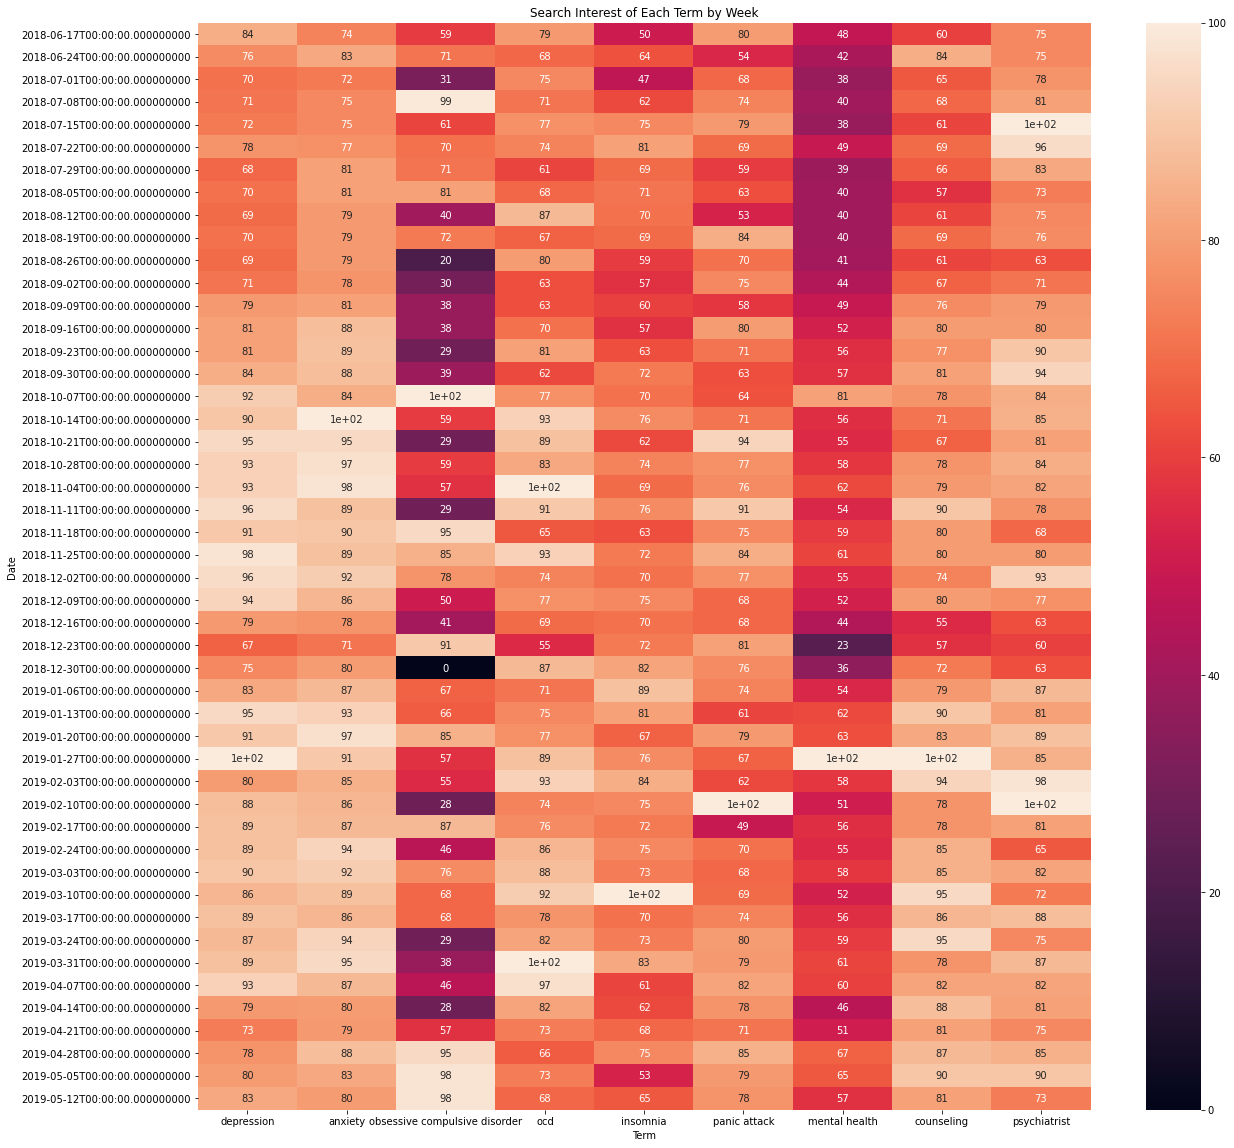

In [55]:
plt.figure(figsize=(20, 20))
plt.title("Search Interest of Each Term by Week")
sns.heatmap(data=canada_data_19, annot=True)
plt.xlabel("Term");
plt.ylabel("Date");

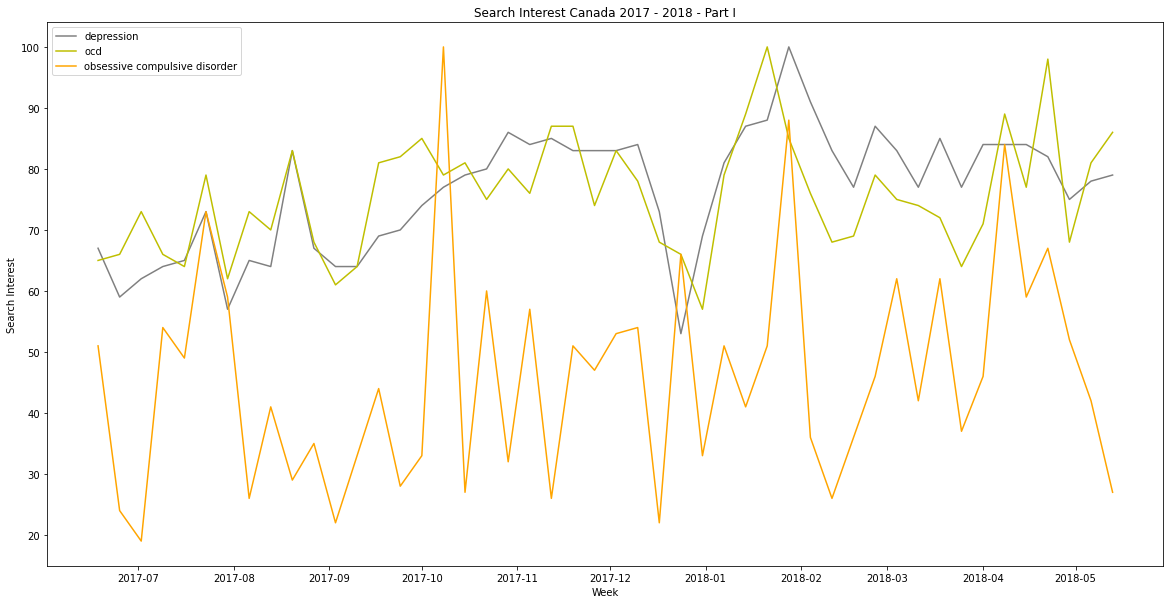

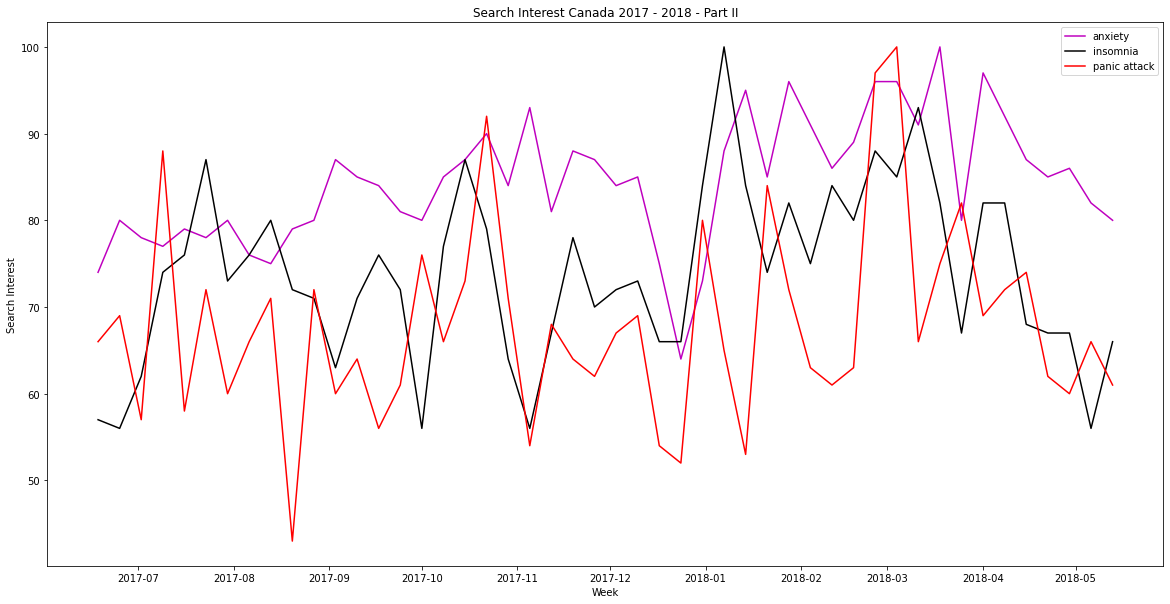

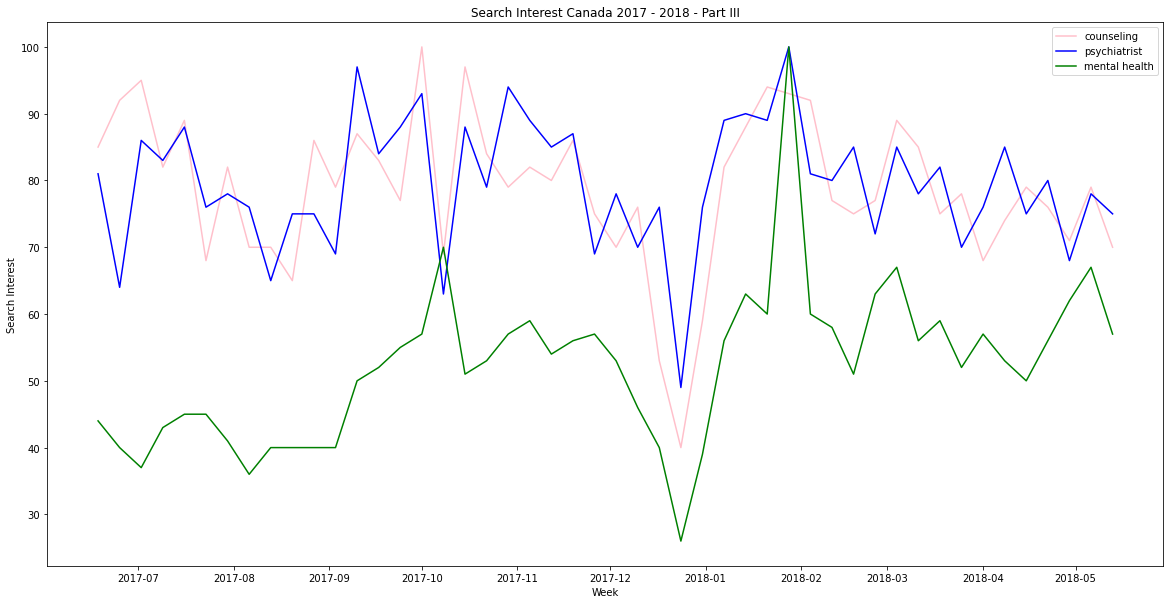

In [56]:
plt.figure(figsize=(20, 10))
plt.plot(canada_data_18.index, canada_data_18['depression'], color='gray')
plt.plot(canada_data_18.index, canada_data_18['ocd'], color='y')
plt.plot(canada_data_18.index, canada_data_18['obsessive compulsive disorder'], color='orange')

plt.legend(['depression', 'ocd', 'obsessive compulsive disorder', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Canada 2017 - 2018 - Part I');

plt.figure(figsize=(20, 10))
plt.plot(canada_data_18.index, canada_data_18['anxiety'], color='m')
plt.plot(canada_data_18.index, canada_data_18['insomnia'], color='black')
plt.plot(canada_data_18.index, canada_data_18['panic attack'], color='r')

plt.legend(['anxiety', 'insomnia', 'panic attack', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Canada 2017 - 2018 - Part II');

plt.figure(figsize=(20, 10))
plt.plot(canada_data_18.index, canada_data_18['counseling'], color='pink')
plt.plot(canada_data_18.index, canada_data_18['psychiatrist'], color='blue')
plt.plot(canada_data_18.index, canada_data_18['mental health'], color='green')

plt.legend(['counseling', 'psychiatrist', 'mental health', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Canada 2017 - 2018 - Part III');

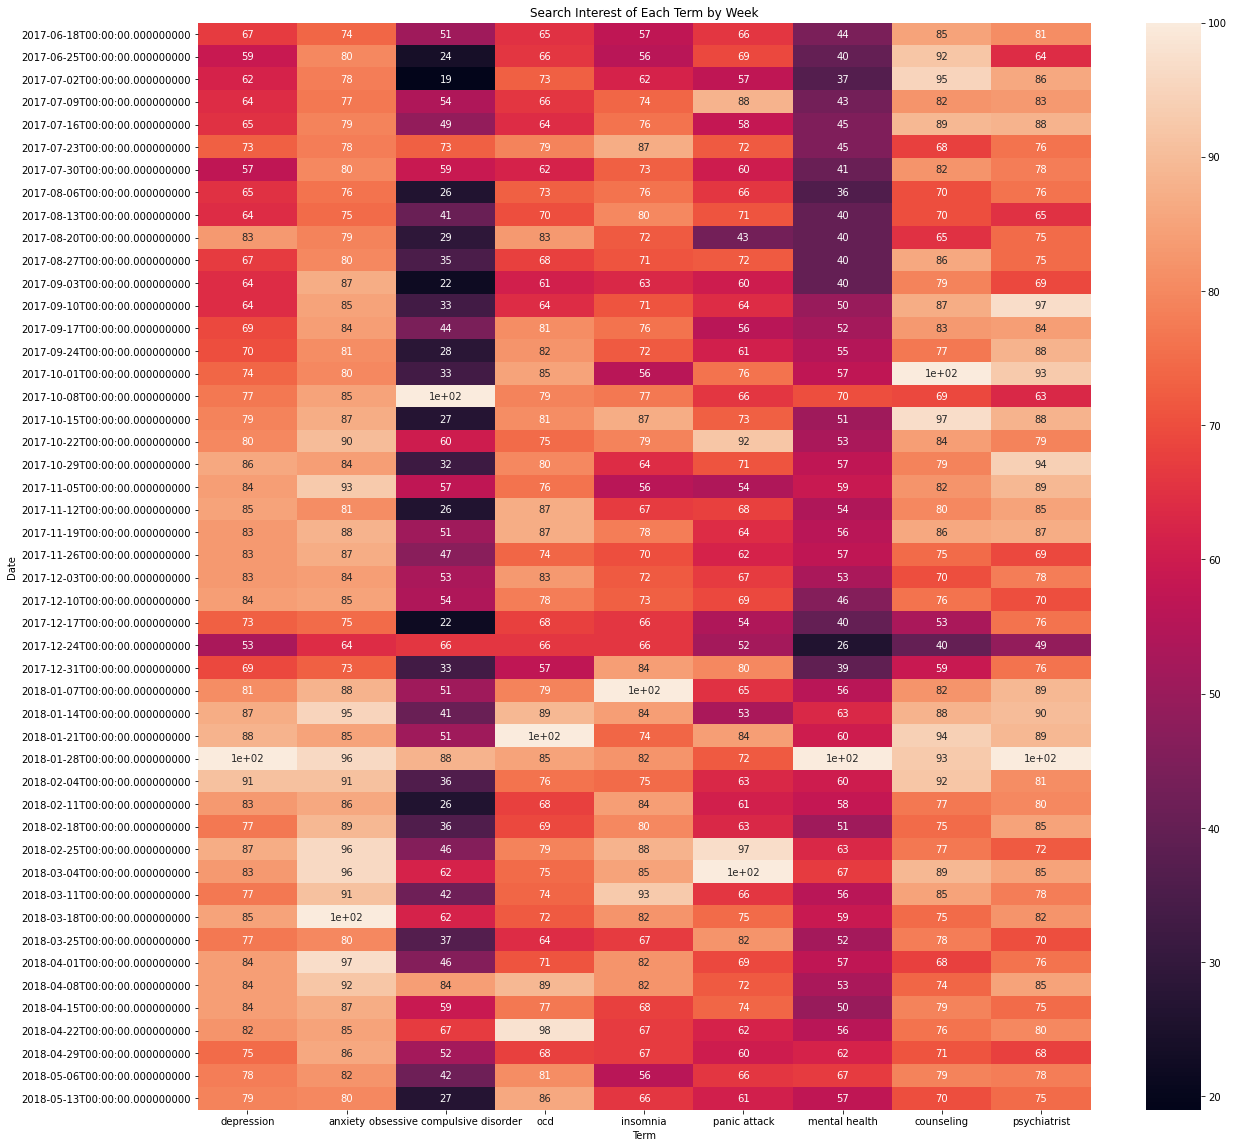

In [57]:
plt.figure(figsize=(20, 20))
plt.title("Search Interest of Each Term by Week")
sns.heatmap(data=canada_data_18, annot=True)
plt.xlabel("Term");
plt.ylabel("Date");

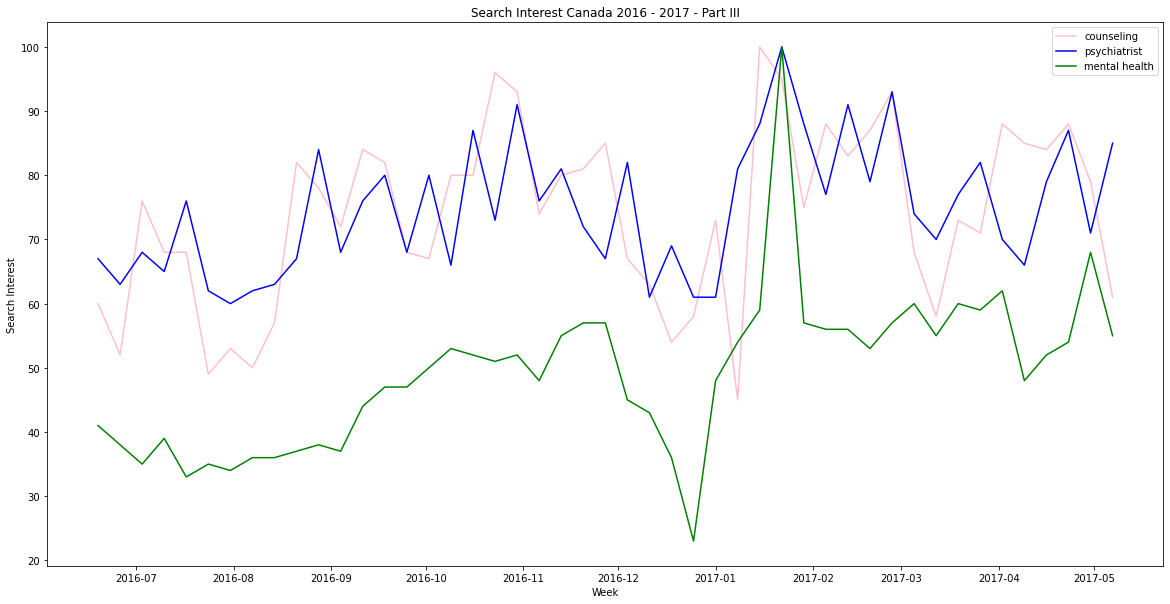

In [58]:
plt.figure(figsize=(20, 10))
plt.plot(canada_data_17.index, canada_data_17['depression'], color='gray')
plt.plot(canada_data_17.index, canada_data_17['ocd'], color='y')
plt.plot(canada_data_17.index, canada_data_17['obsessive compulsive disorder'], color='orange')

plt.legend(['depression', 'ocd', 'obsessive compulsive disorder', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Canada 2016 - 2017 - Part I');

plt.figure(figsize=(20, 10))
plt.plot(canada_data_17.index, canada_data_17['anxiety'], color='m')
plt.plot(canada_data_17.index, canada_data_17['insomnia'], color='black')
plt.plot(canada_data_17.index, canada_data_17['panic attack'], color='r')

plt.legend(['anxiety', 'insomnia', 'panic attack', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Canada 2016 - 2017 - Part II');

plt.figure(figsize=(20, 10))
plt.plot(canada_data_17.index, canada_data_17['counseling'], color='pink')
plt.plot(canada_data_17.index, canada_data_17['psychiatrist'], color='blue')
plt.plot(canada_data_17.index, canada_data_17['mental health'], color='green')

plt.legend(['counseling', 'psychiatrist', 'mental health', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Canada 2016 - 2017 - Part III');

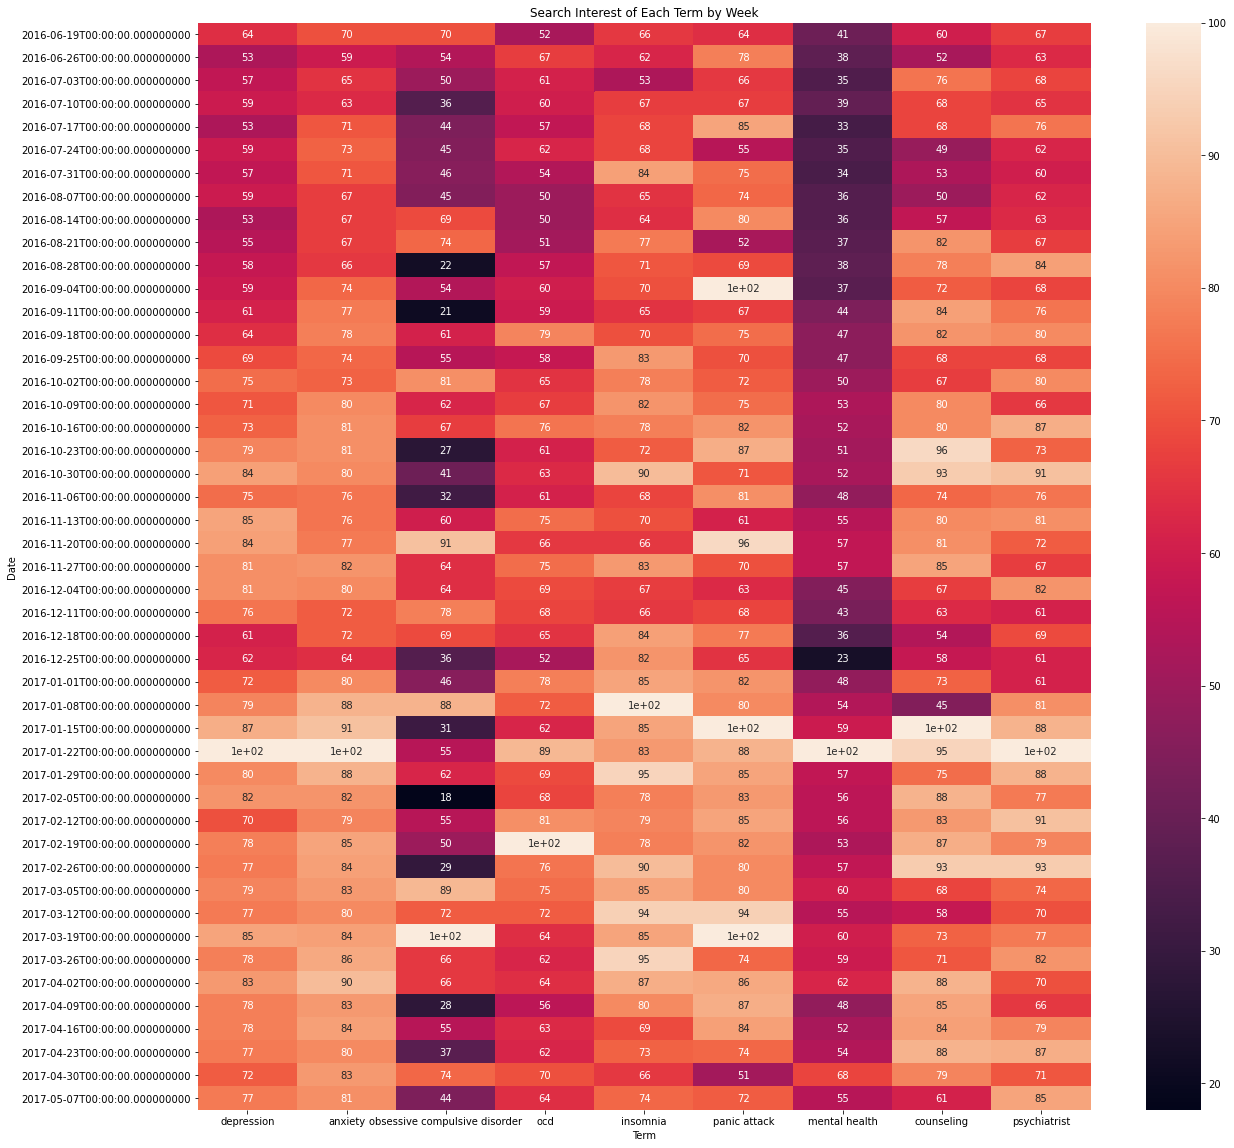

In [59]:
plt.figure(figsize=(20, 20))
plt.title("Search Interest of Each Term by Week")
sns.heatmap(data=canada_data_17, annot=True)
plt.ylabel("Date");
plt.xlabel("Term");

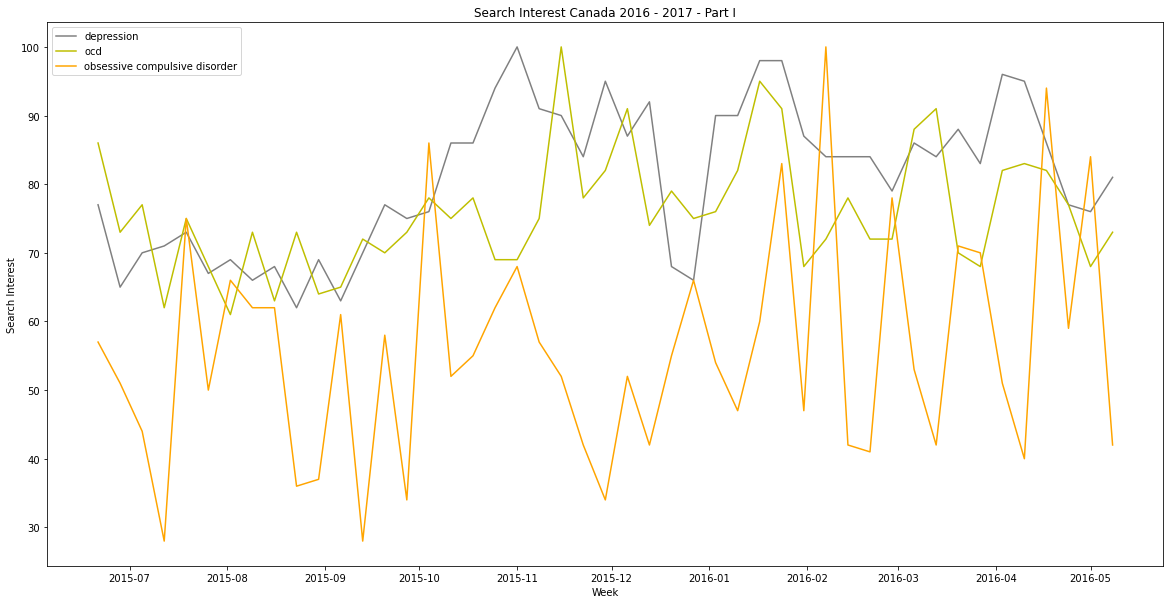

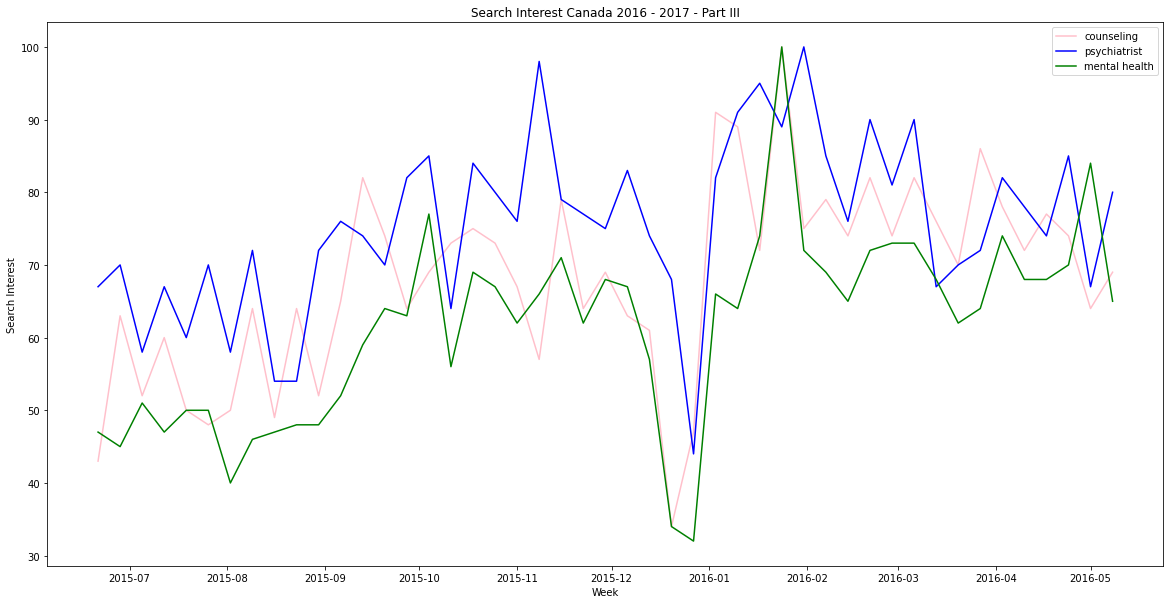

In [60]:
plt.figure(figsize=(20, 10))
plt.plot(canada_data_16.index, canada_data_16['depression'], color='gray')
plt.plot(canada_data_16.index, canada_data_16['ocd'], color='y')
plt.plot(canada_data_16.index, canada_data_16['obsessive compulsive disorder'], color='orange')

plt.legend(['depression', 'ocd', 'obsessive compulsive disorder', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Canada 2016 - 2017 - Part I');

plt.figure(figsize=(20, 10))
plt.plot(canada_data_16.index, canada_data_16['anxiety'], color='m')
plt.plot(canada_data_16.index, canada_data_16['insomnia'], color='black')
plt.plot(canada_data_16.index, canada_data_16['panic attack'], color='r')

plt.legend(['anxiety', 'insomnia', 'panic attack', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Canada 2016 - 2017 - Part II');

plt.figure(figsize=(20, 10))
plt.plot(canada_data_16.index, canada_data_16['counseling'], color='pink')
plt.plot(canada_data_16.index, canada_data_16['psychiatrist'], color='blue')
plt.plot(canada_data_16.index, canada_data_16['mental health'], color='green')

plt.legend(['counseling', 'psychiatrist', 'mental health', 'outbreak'])
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.title('Search Interest Canada 2016 - 2017 - Part III');

In [61]:
plt.figure(figsize=(20, 20))
plt.title("Search Interest of Each Term by Week")
sns.heatmap(data=canada_data_16, annot=True)
plt.xlabel("Term");
plt.ylabel("Date");

In [62]:
maximum_peaks = nump.max(canada_data, axis=0)
maximum_dates = [datetime.fromtimestamp(canada_data.index[canada_data[t] == maximum_peaks[t]][0].value / 1000000000) for t in terms]
print("The maximum peak of each term:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] +"  " + str(maximum_dates[i])))

The maximum peak of each term:
                             depression  2020-01-19 00:00:00                              
                               anxiety  2020-01-26 00:00:00                               
                    obsessive compulsive disorder  2020-03-01 00:00:00                    
                                 ocd  2020-03-01 00:00:00                                 
                              insomnia  2020-03-01 00:00:00                               
                            panic attack  2020-01-26 00:00:00                             
                            mental health  2019-10-06 00:00:00                            
                             counseling  2020-01-12 00:00:00                              
                            psychiatrist  2020-02-02 00:00:00                             


Peak before the outbreak: "depression", "anxiety", "panic attack", "mental health", "counseling"

Peak after the outbreak: "obsessive compulsive disorder", "ocd", "insomnia", "psychiatrist"

In [63]:
overall_average = nump.average(canada_data, axis=0)
before_average = nump.average(canada_data.loc[canada_data.index < '2020-01-31'], axis=0)
after_average = nump.average(canada_data.loc[canada_data.index >= '2020-01-31'], axis=0)
print("The average interest of each term over the 12 months:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % overall_average[i]))
print()
          
print("The average interest of each term before Jan, 31, 2020:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % before_average[i]))
print()

print("The average interest of each term after Jan, 31, 2020:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % after_average[i]))  
print()

The average interest of each term over the 12 months:
                                   depression    81.37                                    
                                     anxiety    84.82                                     
                          obsessive compulsive disorder    54.39                          
                                       ocd    78.88                                       
                                    insomnia    79.22                                     
                                  panic attack    77.59                                   
                                  mental health    59.00                                  
                                   counseling    73.22                                    
                                  psychiatrist    72.69                                   

The average interest of each term before Jan, 31, 2020:
                                   depression    79.88                

In [64]:
canada_diff = after_average - before_average

In [65]:
print("The average interest of each term after the outbreak changed by:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "  " + "%.2f" % (100 * (after_average[i] - before_average[i]) / before_average[i]) + "%"))

The average interest of each term after the outbreak changed by:
                                    depression  5.30%                                     
                                     anxiety  -0.29%                                      
                          obsessive compulsive disorder  -6.03%                           
                                        ocd  9.11%                                        
                                     insomnia  -0.96%                                     
                                   panic attack  5.92%                                    
                                   mental health  3.98%                                   
                                    counseling  -5.28%                                    
                                  psychiatrist  -13.43%                                   


Average search interest increased after the outbreak: "depression", "ocd", "panic attack", "mental health"

Average search interest decreased after the outbreak: "anxiety", "insomnia", "counseling", "psychiatrist"

In [66]:
overall_var = nump.var(canada_data, axis=0)
before_var = nump.var(canada_data.loc[iran_data.index < '2020-01-31'], axis=0)
after_var = nump.var(canada_data.loc[iran_data.index >= '2020-01-31'], axis=0)
print("The variance of each term over the 12 months:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % overall_var[i]))
print()
          
print("The variance of each term before Jan, 31:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % before_var[i]))
print()

print("The variance of each term after Jan, 31:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % after_var[i]))  
print()

The variance of each term over the 12 months:
                                   depression    91.88                                    
                                     anxiety    50.15                                     
                         obsessive compulsive disorder    279.73                          
                                       ocd    89.67                                       
                                    insomnia    104.05                                    
                                  panic attack    97.85                                   
                                 mental health    156.78                                  
                                   counseling    125.93                                   
                                  psychiatrist    178.49                                  

The variance of each term before Jan, 31:
                                   depression    112.96                                   
 

In [67]:
overall_average_19 = nump.average(canada_data_19, axis=0)
before_average_19 = nump.average(canada_data_19.loc[canada_data_19.index < '2019-01-31'], axis=0)
after_average_19 = nump.average(canada_data_19.loc[canada_data_19.index >= '2019-01-31'], axis=0)
print("The average interest of each term from 2018 to 2019:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % overall_average_19[i]))
print()
          
print("The average interest of each term before Jan, 31, 2019:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % before_average_19[i]))
print()

print("The average interest of each term after Jan, 31, 2019:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % after_average_19[i]))  
print()

The average interest of each term from 2018 to 2019:
                                   depression    83.21                                    
                                     anxiety    85.44                                     
                          obsessive compulsive disorder    58.62                          
                                       ocd    77.90                                       
                                    insomnia    69.98                                     
                                  panic attack    73.06                                   
                                  mental health    52.92                                  
                                   counseling    77.04                                    
                                  psychiatrist    80.48                                   

The average interest of each term before Jan, 31, 2019:
                                   depression    82.45                 

In [68]:
overall_average_18 = nump.average(canada_data_18, axis=0)
before_average_18 = nump.average(canada_data_18.loc[canada_data_18.index < '2018-01-31'], axis=0)
after_average_18 = nump.average(canada_data_18.loc[canada_data_18.index >= '2018-01-31'], axis=0)
print("The average interest of each term from 2017 to 2018:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % overall_average_18[i]))
print()
          
print("The average interest of each term before Jan, 31, 2018:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % before_average_18[i]))
print()

print("The average interest of each term after Jan, 31, 2018:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % after_average_18[i]))  
print()

The average interest of each term from 2017 to 2018:
                                   depression    76.42                                    
                                     anxiety    84.40                                     
                          obsessive compulsive disorder    45.90                          
                                       ocd    75.69                                       
                                    insomnia    73.81                                     
                                  panic attack    67.83                                   
                                  mental health    52.35                                  
                                   counseling    78.79                                    
                                  psychiatrist    79.56                                   

The average interest of each term before Jan, 31, 2018:
                                   depression    74.00                 

In [69]:
overall_average_17 = nump.average(canada_data_17, axis=0)
before_average_17 = nump.average(canada_data_17.loc[canada_data_17.index < '2017-01-31'], axis=0)
after_average_17 = nump.average(canada_data_17.loc[canada_data_17.index >= '2017-01-31'], axis=0)
print("The average interest of each term from 2016 to 2017:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % overall_average_17[i]))
print()
          
print("The average interest of each term before Jan, 31, 2017:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % before_average_17[i]))
print()

print("The average interest of each term after Jan, 31, 2017:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % after_average_17[i]))  
print()

The average interest of each term from 2016 to 2017:
                                   depression    71.83                                    
                                     anxiety    77.60                                     
                          obsessive compulsive disorder    54.96                          
                                       ocd    65.68                                       
                                    insomnia    76.60                                     
                                  panic attack    76.85                                   
                                  mental health    49.19                                  
                                   counseling    73.85                                    
                                  psychiatrist    74.77                                   

The average interest of each term before Jan, 31, 2017:
                                   depression    69.24                 

In [70]:
overall_average_16 = nump.average(canada_data_16, axis=0)
before_average_16 = nump.average(canada_data_16.loc[canada_data_16.index < '2016-01-31'], axis=0)
after_average_16 = nump.average(canada_data_16.loc[canada_data_16.index >= '2016-01-31'], axis=0)
print("The average interest of each term from 2015 to 2016:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % overall_average_16[i]))
print()
          
print("The average interest of each term before Jan, 31, 2016:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % before_average_16[i]))
print()

print("The average interest of each term after Jan, 31, 2016:")
for i in range(len(terms)):
    print('{:^90}'.format(terms[i] + "    %.2f" % after_average_16[i]))  
print()

The average interest of each term from 2015 to 2016:
                                   depression    80.91                                    
                                     anxiety    84.91                                     
                          obsessive compulsive disorder    55.96                          
                                       ocd    75.87                                       
                                    insomnia    72.74                                     
                                  panic attack    69.70                                   
                                  mental health    61.62                                  
                                   counseling    67.98                                    
                                  psychiatrist    75.43                                   

The average interest of each term before Jan, 31, 2016:
                                   depression    79.16                 

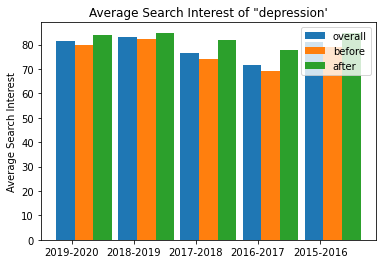

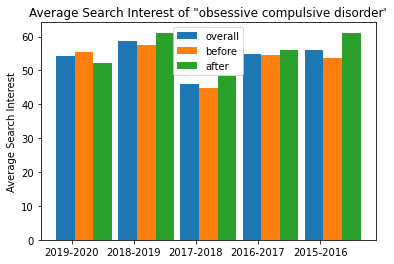

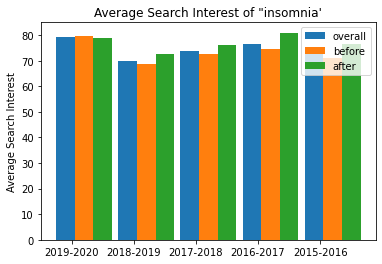

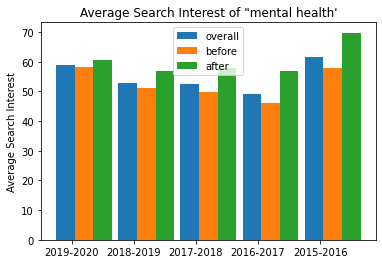

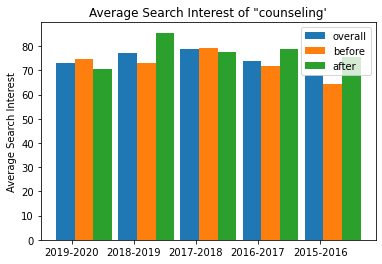

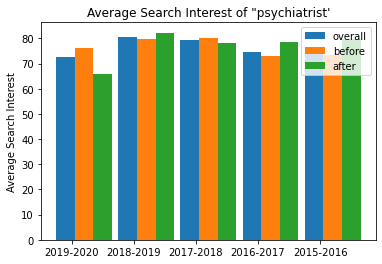

In [71]:
# Plot the average search interest of each term for overall year, before Jan, 31
# and after Jan 31, 2016, 2017, 2018, 2019, 2020
labels = ['2019-2020', '2018-2019', '2017-2018', '2016-2017', '2015-2016']
for i in range(len(terms)):
    overall = [overall_average[i], overall_average_19[i], overall_average_18[i], overall_average_17[i], overall_average_16[i]]
    before = [before_average[i], before_average_19[i], before_average_18[i], before_average_17[i], before_average_16[i]]
    after = [after_average[i], after_average_19[i], after_average_18[i], after_average_17[i], after_average_16[i]]
    x = nump.arange(len(labels))
    width = 0.3
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width / 3, overall, width, label='overall')
    rects2 = ax.bar(x + 2 * width / 3, before, width, label='before')
    rects3 = ax.bar(x + 5 * width / 3, after, width, label = 'after')
    ax.set_ylabel('Average Search Interest')
    ax.set_title('Average Search Interest of "' + terms[i] + "'")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

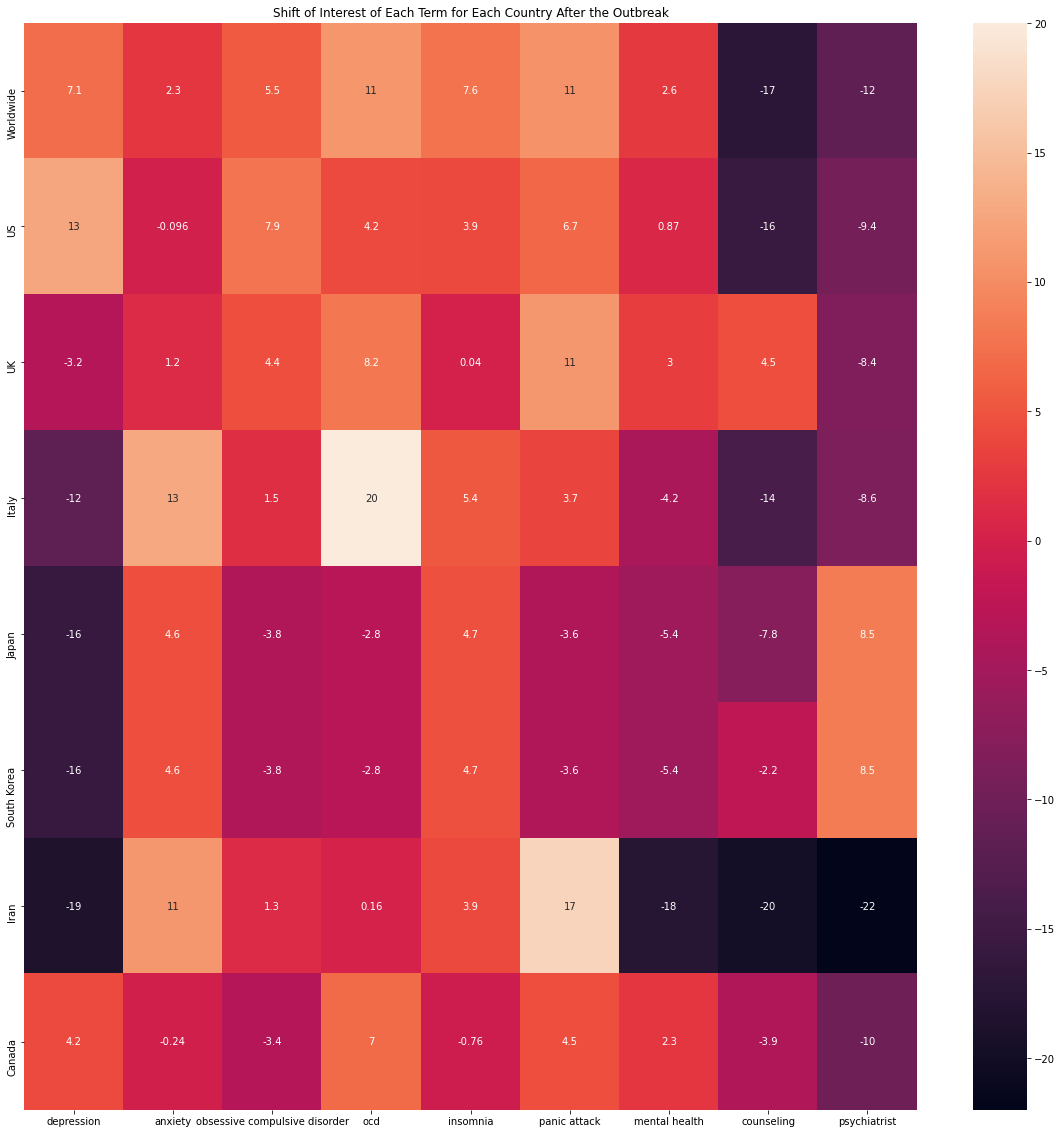

In [72]:
diff = [world_diff, us_diff, uk_diff, italy_diff, japan_diff, sk_diff, iran_diff, canada_diff]
fig, ax = plt.subplots(figsize=(20, 20))
plt.title("Shift of Interest of Each Term for Each Country After the Outbreak")
sns.heatmap(data=diff, annot=True)
ax.set_xticklabels(terms);
ax.set_yticklabels(["Worldwide", "US", "UK", "Italy", "Japan", "South Korea", "Iran", "Canada"]);

Positive values indicate an increase of interest, negative indicates decrease.

**Hypothesis Testing: Worldwide example**

The dataset contains 33 weeks before the global outbreak and 18 weeks afterwards, sample size is less than 30, and many data points easily deviate far from mean which causes a long tail, thus it is not suitable to use Gaussian distribution modeling, instead, t-distribution is more appropriate.

Treating the data of each week as a single point, and averaging the search interest of all terms, we get u0 = 75.99 for before the global outbreak, and u1 = 79.59 afterwards. Assum u0 is the mean for the normal time, u1 is the sample average, where the search interest after the outbreak follows t-distribution. Let E[u1] denote the expected value for u1. We want to show that COVID-19 has impact on people's concern for mental health.

The hypothesis test: Null hypothesis H0: E[u1] = u0 versus alternative hypothesis H1: E[u1] > u0

t = (u1 - u0) / sqrt(var / n) = 3.7698

Setting the one-tail area alpha to be 0.001, we can get t(n - 1, alpha) = t(17, 0.001) = 3.645767 < t (https://www.researchgate.net/publication/236673256_A_Simple_Method_for_Generation_of_Statistical_Tables_by_the_Help_of_Excel_Software/figures?lo=1 ), so we can reject H0 in favor of H1 with probability of 0.001 of H0 being true.